In [1]:
import wikipedia
import pandas as pd
import spacy
import wikipediaapi
wiki_wiki = wikipediaapi.Wikipedia('en', extract_format=wikipediaapi.ExtractFormat.WIKI)

import re

import seaborn as sns
sns.set()

import en_core_web_lg
nlp = en_core_web_lg.load()
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation

import matplotlib.pyplot as plt


/opt/anaconda3/lib/python3.7/site-packages/spacy/util.py:845: UserWarning: [W094] Model 'en_core_web_lg' (2.1.0) specifies an under-constrained spaCy version requirement: >=2.1.0. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.3.1,<3.4.0
  warnings.warn(warn_msg)


OSError: [E053] Could not read config file from /opt/anaconda3/lib/python3.7/site-packages/en_core_web_lg/en_core_web_lg-2.1.0/config.cfg

In [2]:
### Process strips out the crap and regularises the word forms
###Uses wordnet to get rid of gibberish

nlp = spacy.load("en",disable=['parser', 'tagger','NER'])
nlp.vocab["\n"].is_stop = True


def process(text):
    parsed_text = nlp(text)
    full_vocab = [token.lemma_.lower() for token in parsed_text \
                   if not token.is_stop and\
                   not token.is_punct
                  #below I add some new criteria - CR
                  and not token.text.strip() == ''       #remove empty text
                  and token.is_ascii 
                  and re.match('[a-zA-Z]',token.text) #remove non ascii 
                  and not re.match('^[\n]+$',token.text) #remove multiple line breaks
                  and not token.like_url                 #remove urls
                  and not '&nbsp' in token.text and not token.like_num]         # remove html garble        
    return full_vocab


In [14]:
### keeps full vocab version

nlp = spacy.load("en",disable=['parser', 'tagger','NER'])
nlp.vocab["\n"].is_stop = True


    

### Process strips out the crap and regularises the word forms
def process_(text):
    parsed_text = nlp(text)
    full_vocab = [token.lemma_.lower() for token in parsed_text \
                   if not token.is_stop and\
                   not token.is_punct
                  #below I add some new criteria - CR
                  and not token.text.strip() == ''       #remove empty text
                  and token.is_ascii                     #remove non ascii 
                  and not re.match('^[\n]+$',token.text) #remove multiple line breaks
                  and not token.like_url                 #remove urls
                  and not '&nbsp' in token.text and not token.like_num]         # remove html garble        
    return full_vocab


In [ ]:
#disciplines = ['Physics', 'History', 'Psychology', 'Linguistics', 'Biology', 'Mathematics', 'Philosophy', 'Engineering', 'Sociology', 'Literary criticism', 'Art history', 'Theology', 'Geology', 'Cultural studies', "Film_studies", "Zoology", "Computer science", "Medicine", "Political science", "Chemistry", "Economics", "Astronomy", \
             #  "Archaeology", "Jurisprudence", "Anthropology", "Classics", "Pharmacology", "Architecture", "Oceanography"]

In [1]:
disciplines = ["Architecture",

"Agriculture",

"Astronomy",

"Archaeology",

"Acoustics",

"Art history",

"Chemistry",

"Area Studies",

"Computer Science",

"Economics",

"Classics",

"Anthropology",
               
"Geology",

"Communications",

"Criminology",

"Engineering",

"Behavioral Sciences",

"Mathematics",

"Cultural Studies",

"History",

"Biochemistry",

"Meteorology",
               
"Demography",

"Information Science",

"Conservation science (cultural heritage)",

"Development studies",

"Literary studies",

"Materials science",

"Musicology",

"Microbiology",

"Oceanography",

"Ethnic studies",

"Philosophy",

"Religious studies",

"Geography",

"Medicine",

"Physics",

"Jurisprudence",

"Dentistry",

"International relations",

"Management science",

"Linguistics",

"Developmental Biology",

"Robotics",
            
"Psychology",

"Public administration",

"Environmental Science",

"Social Work",

"Sociology",

"Food science",

"Urban studies",

"Women's Studies",

"Medical ethics",

"Mycology",

"Neuroscience",

"Nursing",

"Dietetics",

"Paleontology",

"Pharmacology",

"Physiology",

"Plant Science",

"Psychiatry",

"Sport science",

"Veterinary science",

"Zoology" ]

In [2]:
len(disciplines)

65

In [4]:
disc = '\n'.join(disciplines)

In [5]:
print(disc)

Architecture
Agriculture
Astronomy
Archaeology
Acoustics
Art history
Chemistry
Area Studies
Computer Science
Economics
Classics
Anthropology
Geology
Communications
Criminology
Engineering
Behavioral Sciences
Mathematics
Cultural Studies
History
Biochemistry
Meteorology
Demography
Information Science
Conservation science (cultural heritage)
Development studies
Literary studies
Materials science
Musicology
Microbiology
Oceanography
Ethnic studies
Philosophy
Religious studies
Geography
Medicine
Physics
Jurisprudence
Dentistry
International relations
Management science
Linguistics
Developmental Biology
Robotics
Psychology
Public administration
Environmental Science
Social Work
Sociology
Food science
Urban studies
Women's Studies
Medical ethics
Mycology
Neuroscience
Nursing
Dietetics
Paleontology
Pharmacology
Physiology
Plant Science
Psychiatry
Sport science
Veterinary science
Zoology


In [8]:
with open('/Users/jamescarney/Downloads/Discipline_list.txt', 'a') as f:
    f.write(disc)

In [5]:
arts = [wikipedia.page(i, auto_suggest=False) for i in disciplines]

In [7]:
len(arts)

65

In [8]:
arts

[<WikipediaPage 'Architecture'>,
 <WikipediaPage 'Agriculture'>,
 <WikipediaPage 'Astronomy'>,
 <WikipediaPage 'Archaeology'>,
 <WikipediaPage 'Acoustics'>,
 <WikipediaPage 'Art history'>,
 <WikipediaPage 'Chemistry'>,
 <WikipediaPage 'Area studies'>,
 <WikipediaPage 'Computer science'>,
 <WikipediaPage 'Economics'>,
 <WikipediaPage 'Classics'>,
 <WikipediaPage 'Anthropology'>,
 <WikipediaPage 'Geology'>,
 <WikipediaPage 'Communication'>,
 <WikipediaPage 'Criminology'>,
 <WikipediaPage 'Engineering'>,
 <WikipediaPage 'Behavioural sciences'>,
 <WikipediaPage 'Mathematics'>,
 <WikipediaPage 'Cultural studies'>,
 <WikipediaPage 'History'>,
 <WikipediaPage 'Biochemistry'>,
 <WikipediaPage 'Meteorology'>,
 <WikipediaPage 'Demography'>,
 <WikipediaPage 'Information science'>,
 <WikipediaPage 'Conservation science (cultural heritage)'>,
 <WikipediaPage 'Development studies'>,
 <WikipediaPage 'Literary criticism'>,
 <WikipediaPage 'Materials science'>,
 <WikipediaPage 'Musicology'>,
 <Wikipedi

In [8]:
text = [i.content for i in arts]

In [9]:
a = process_(text[0])

NameError: name 'process_' is not defined

In [18]:
b = [i for i in a if str(i).lower() in words.words()]

In [19]:
b

['architecture',
 'architect',
 'chief',
 'creator',
 'process',
 'product',
 'plan',
 'design',
 'construct',
 'building',
 'structure',
 'architectural',
 'work',
 'material',
 'form',
 'building',
 'perceive',
 'cultural',
 'symbol',
 'work',
 'art',
 'historical',
 'civilization',
 'identify',
 'survive',
 'architectural',
 'achievement',
 'practice',
 'begin',
 'prehistoric',
 'era',
 'way',
 'express',
 'culture',
 'civilization',
 'continent',
 'reason',
 'architecture',
 'consider',
 'form',
 'art',
 'architecture',
 'write',
 'ancient',
 'time',
 'early',
 'survive',
 'text',
 'architectural',
 'theory',
 'century',
 'ad',
 'treatise',
 'de',
 'architect',
 'accord',
 'good',
 'build',
 'embody',
 'durability',
 'utility',
 'beauty',
 'late',
 'idea',
 'see',
 'beauty',
 'objective',
 'quality',
 'building',
 'find',
 'proportion',
 'write',
 'excellent',
 'forward',
 'idea',
 'style',
 'art',
 'century',
 'century',
 'declare',
 'form',
 'follow',
 'function',
 'function',
 '

In [10]:
vectorizer = TfidfVectorizer(input = 'content', tokenizer = process)

In [11]:
X = vectorizer.fit_transform(text)

In [12]:
X

<65x17241 sparse matrix of type '<class 'numpy.float64'>'
	with 66517 stored elements in Compressed Sparse Row format>

In [13]:
result = X.todense()

In [14]:
dense = X.todense()
denselist = dense.tolist()
df = pd.DataFrame(
    denselist,columns=vectorizer.get_feature_names())

In [14]:
#df.index = ['physics', 'history', 'psychology', 'linguistics', 'biology', 'mathematics', 'philosophy', 'engineering', 'sociology', 'literary critcism', 'art history', 'theology', 'geology', "cultural studies", 'film studies', "zoology", "computer science", "medicine", "political science", "chemistry", "economics", "astronomy", "archaeology", "jurisprudence", \
           # "anthropology", "classics", "pharmacology", "architecture", "oceanography"]



In [15]:
df.index = ["Architecture",

"Agriculture",

"Astronomy",

"Archaeology",

"Acoustics",

"Art history",

"Chemistry",

"Area Studies",

"Computer Science",

"Economics",

"Classics",

"Anthropology",
               
"Geology",

"Communications",

"Criminology",

"Engineering",

"Behavioral Sciences",

"Mathematics",

"Cultural Studies",

"History",

"Biochemistry",

"Meteorology",
               
"Demography",

"Information Science",

"Conservation studies",

"Development studies",

"Literary studies",

"Materials science",

"Musicology",

"Microbiology",

"Oceanography",

"Ethnic studies",

"Philosophy",

"Religious studies",

"Geography",

"Medicine",

"Physics",

"Jurisprudence",

"Dentistry",

"International relations",

"Management science",

"Linguistics",

"Developmental Biology",

"Robotics",
            
"Psychology",

"Public administration",

"Environmental Science",

"Social Work",

"Sociology",

"Food science",

"Urban studies",

"Women's Studies",

"Medical ethics",

"Mycology",

"Neuroscience",

"Nursing",

"Dietetics",

"Paleontology",

"Pharmacology",

"Physiology",

"Plant Science",

"Psychiatry",

"Sport science",

"Veterinary science",

"Zoology" ]

In [17]:
df.to_csv('/Users/jamescarney/Desktop/Quantifying_interdisciplinarity/TF-IDF_data.csv')

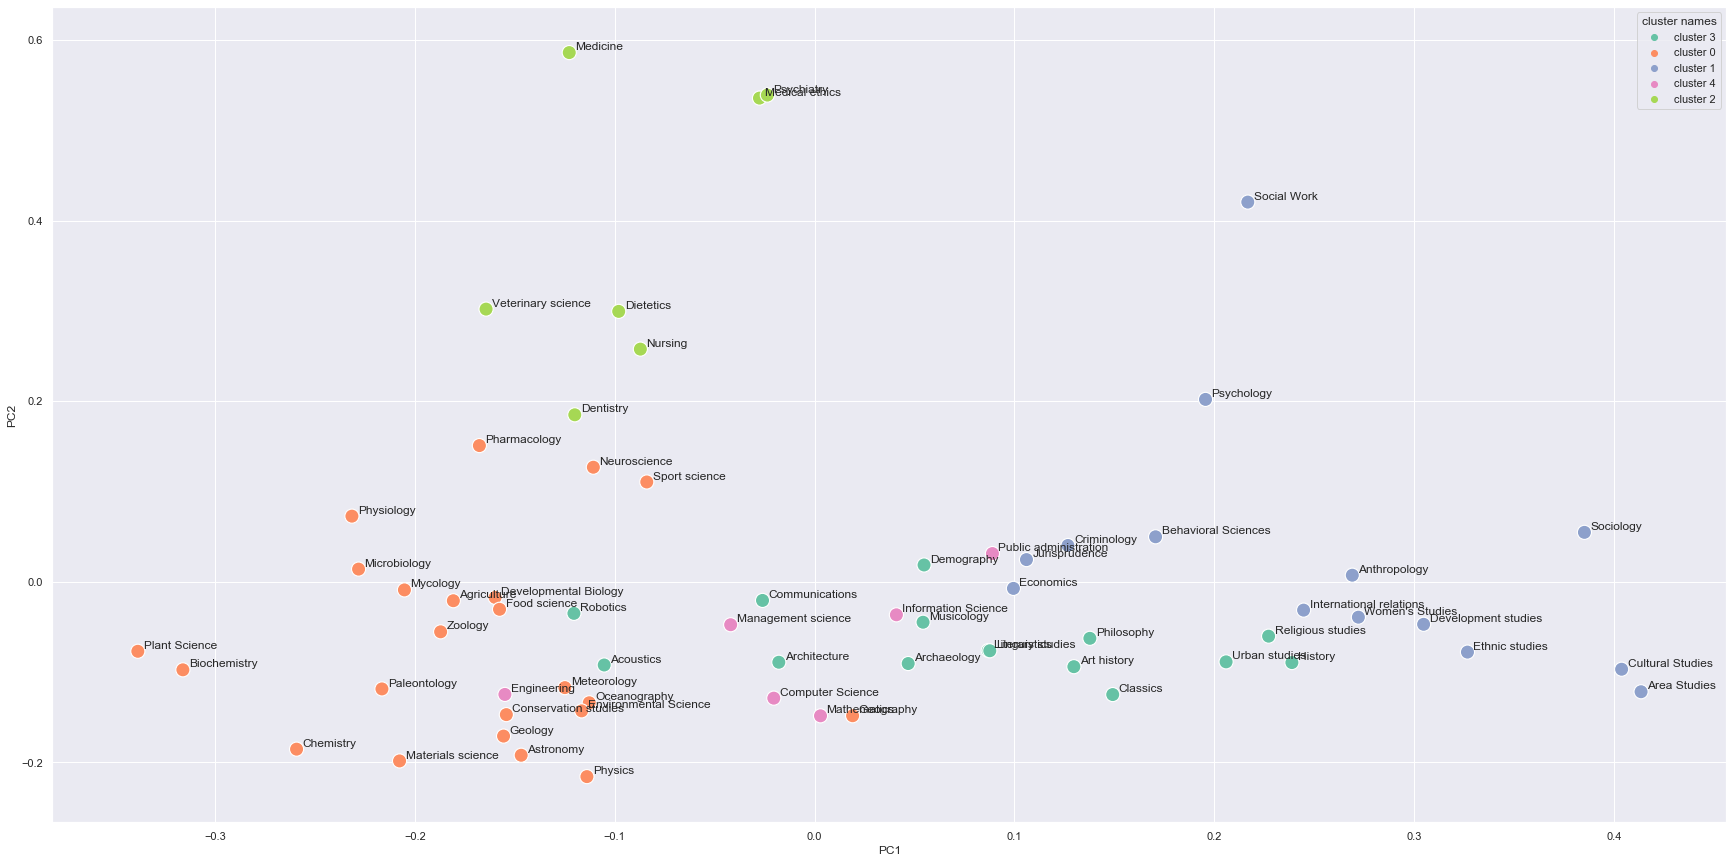

In [40]:




### 2D PCA projection
vecs_ = df

pca_1 = PCA(n_components = 2)

comps_1 = pca_1.fit_transform(vecs_)


pc_df_1 = pd.DataFrame(data = comps_1, columns = ['PC'+str(i) for i in range(1, comps_1.shape[1]+1)])

clustering = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit(vecs_)


vecs_ = vecs_.reset_index()


vecs_df = pd.concat([vecs_, pc_df_1], axis = 1)

vecs_df.index = df.index

del vecs_df['level_0']

vecs_df['clusters'] = clustering.labels_

names = []

for i in vecs_df['clusters']:
    names.append('cluster '+str(i))
    
vecs_df['cluster names'] = names

plt.figure(figsize=(30,15))

sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'cluster names', s = 200,  data = vecs_df)

for i in range(len(vecs_df)):
    plt.annotate(vecs_df.index[i], (vecs_df['PC1'][i]+0.003, vecs_df['PC2'][i]+0.003))


plt.savefig('/Users/jamescarney/Desktop/Quantifying_interdisciplinarity/2D_interdisciplinary.png', dpi = 300)


In [19]:
vecs_df.index

Index(['Architecture', 'Agriculture', 'Astronomy', 'Archaeology', 'Acoustics',
       'Art history', 'Chemistry', 'Area Studies', 'Computer Science',
       'Economics', 'Classics', 'Anthropology', 'Geology', 'Communications',
       'Criminology', 'Engineering', 'Behavioral Sciences', 'Mathematics',
       'Cultural Studies', 'History', 'Biochemistry', 'Meteorology',
       'Demography', 'Information Science', 'Conservation studies',
       'Development studies', 'Literary studies', 'Materials science',
       'Musicology', 'Microbiology', 'Oceanography', 'Ethnic studies',
       'Philosophy', 'Religious studies', 'Geography', 'Medicine', 'Physics',
       'Jurisprudence', 'Dentistry', 'International relations',
       'Management science', 'Linguistics', 'Developmental Biology',
       'Robotics', 'Psychology', 'Public administration',
       'Environmental Science', 'Social Work', 'Sociology', 'Food science',
       'Urban studies', 'Women's Studies', 'Medical ethics', 'Mycology',
 

<Figure size 2160x1080 with 0 Axes>

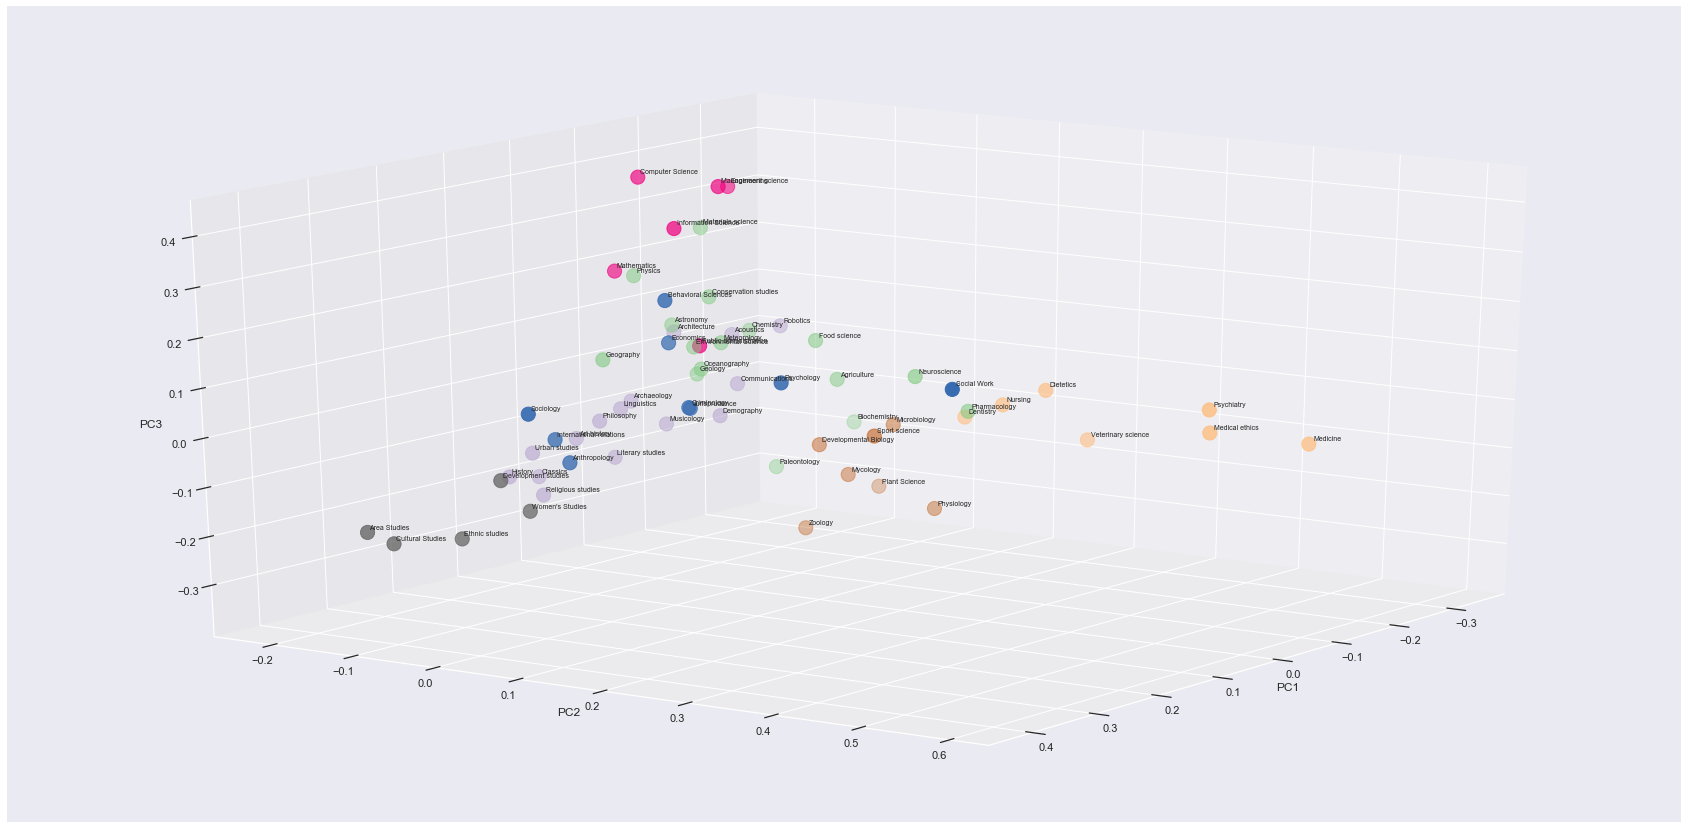

In [41]:
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D

vecs_ = df


pca_1 = PCA(n_components = 3)

comps_1 = pca_1.fit_transform(vecs_)

cols = ['PC'+str(i) for i in range(1, comps_1.shape[1]+1)]

pc_df_1 = pd.DataFrame(data = comps_1, columns = cols)

clustering = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward').fit(vecs_)

#clustering = AffinityPropagation(preference = 10).fit(vecs_)

vecs_ = vecs_.reset_index()


vecs_df = pd.concat([vecs_, pc_df_1], axis = 1)

vecs_df.index = df.index

del vecs_df['level_0']


vecs_df['clusters'] = clustering.labels_

plt.figure(figsize=(30,15))

cmhot = plt.get_cmap("spring")

fig = plt.figure(figsize=(30,15))

ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(vecs_df['PC1'], vecs_df['PC2'], vecs_df['PC3'], c=vecs_df['clusters'], s = 200, cmap='Accent')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')



for i in range(len(vecs_df)):
    ax.text(vecs_df['PC1'][i]+0.015, vecs_df['PC2'][i]+0.015, vecs_df['PC3'][i]+0.015, vecs_df.index[i], fontsize = 'xx-small')
    
ax.view_init(20, 35)

fig.savefig('/Users/jamescarney/Desktop/Quantifying_interdisciplinarity/3D_interdisciplinary.png', dpi = 300)



/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:960: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


<Figure size 2160x1080 with 0 Axes>

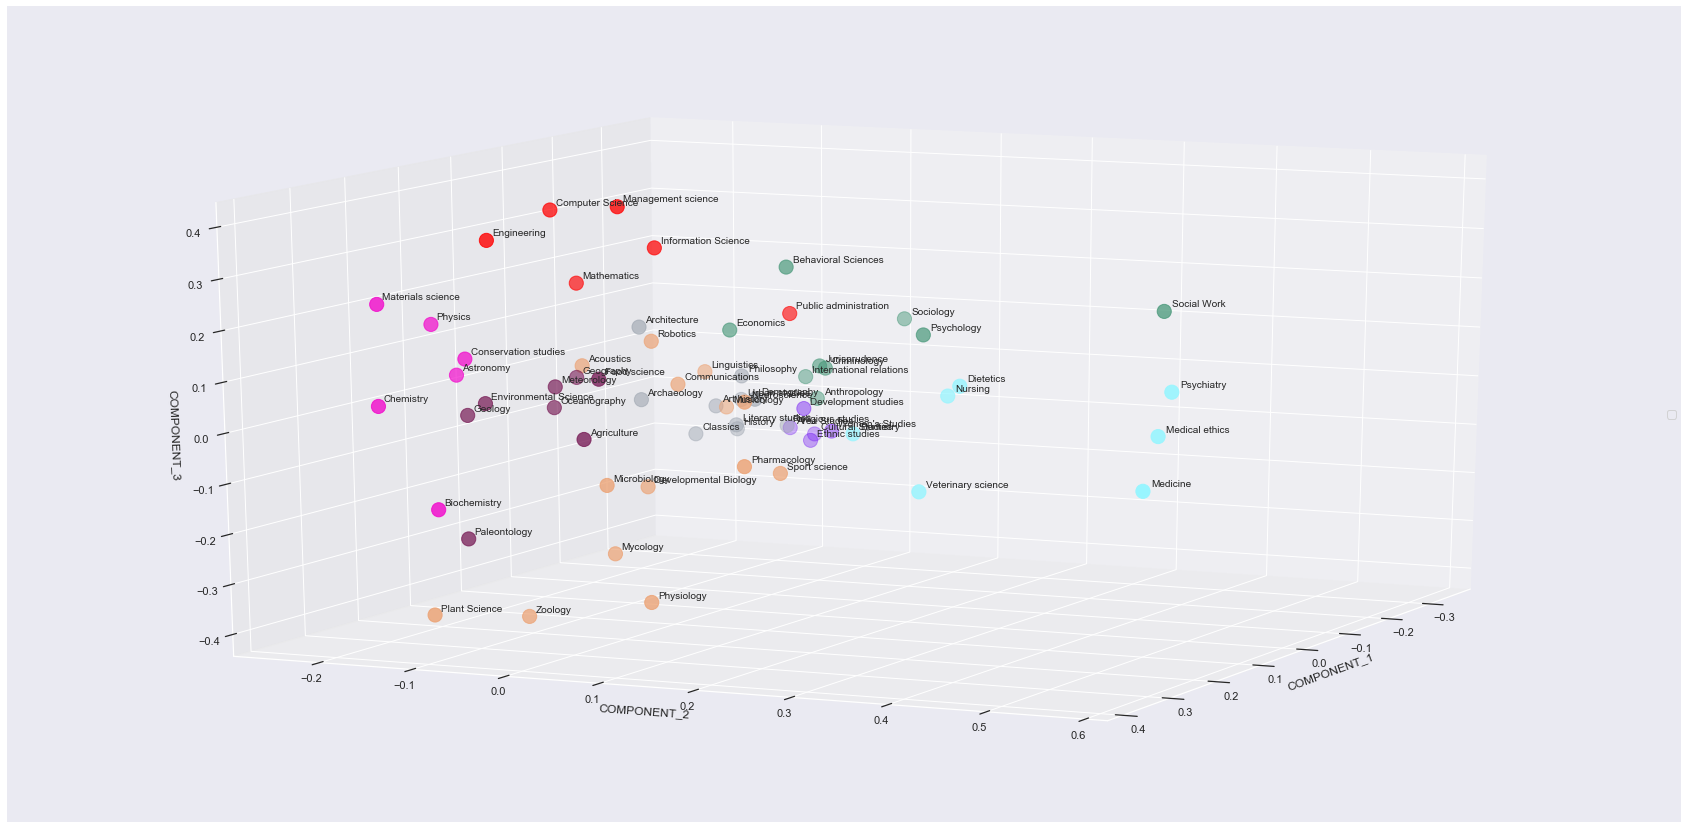

In [137]:
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=4)


vecs_ = df


comps_1 = svd.fit_transform(vecs_)

cols = ['COMPONENT_'+str(i) for i in range(comps_1.shape[1])]

pc_df_1 = pd.DataFrame(data = comps_1, columns = cols)

clustering = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage = 'ward').fit(vecs_)

#clustering = AffinityPropagation(preference = 10).fit(vecs_)

vecs_ = vecs_.reset_index()


vecs_df = pd.concat([vecs_, pc_df_1], axis = 1)

vecs_df.index = df.index

del vecs_df['level_0']


vecs_df['clusters'] = clustering.labels_

from matplotlib.colors import ListedColormap

color = ["#ECA172", "#761954","#419474","#F205CB","#9BA3AE","#98F5FF","#6805F2", "#FF0000"]

clus = [i for i in range(8)]

color = dict(zip(clus, color))

vecs_df['color'] = [color[i] for i in vecs_df['clusters']]

plt.figure(figsize=(30,15))

cmhot = plt.get_cmap("Accent")

fig = plt.figure(figsize=(30,15))

ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter3D(vecs_df['COMPONENT_1'], vecs_df['COMPONENT_2'], vecs_df['COMPONENT_3'], s = 200, c = vecs_df['color'])
plt.legend(*sc.legend_elements(), loc = "right")

ax.set_xlabel('COMPONENT_1')
ax.set_ylabel('COMPONENT_2')
ax.set_zlabel('COMPONENT_3')


for i in range(len(vecs_df)):
    ax.text(vecs_df['COMPONENT_1'][i]+0.015, vecs_df['COMPONENT_2'][i]+0.015, vecs_df['COMPONENT_3'][i]+0.015, vecs_df.index[i], fontsize = 'small')

ax.view_init(15, 25)

fig.savefig('/Users/jamescarney/Desktop/Quantifying_interdisciplinarity/3D_SVD_interdisciplinary_pembroke.png', dpi = 300)


In [165]:
np.shape(comps_1)

(65, 4)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


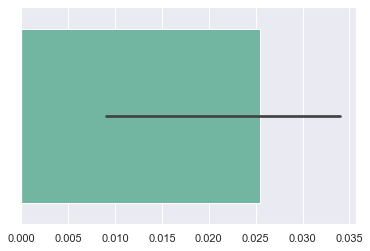

In [132]:
explained_variance=pd.Series(svd.explained_variance_ratio_, index = pc_df_1.columns)

sns.barplot(explained_variance)

In [133]:
explained_variance

COMPONENT_1    0.009099
COMPONENT_2    0.033983
COMPONENT_3    0.033206
dtype: float64

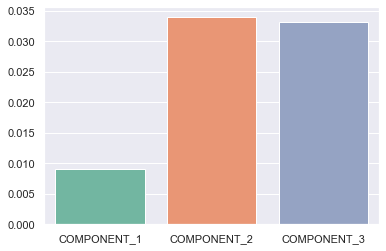

In [136]:
h = sns.barplot(x = explained_variance.index, y = explained_variance.values)

In [135]:
pc_df_1

COMPONENT_1  COMPONENT_2  COMPONENT_3
0      0.234105     0.018332    -0.088032
1      0.266202     0.209795    -0.024746
2      0.236773     0.155523    -0.190580
3      0.304132    -0.028748    -0.090985
4      0.186104     0.073138    -0.092380
..          ...          ...          ...
60     0.253017     0.370014    -0.110289
61     0.289382     0.089439     0.530569
62     0.233330     0.104441     0.116978
63     0.183294     0.149182     0.278766
64     0.340161     0.249827    -0.081425

[65 rows x 3 columns]

In [123]:
vecs_df['color'].head(n=40)

Architecture               #9BA3AE
Agriculture                #761954
Astronomy                  #F205CB
Archaeology                #9BA3AE
Acoustics                  #ECA172
Art history                #9BA3AE
Chemistry                  #F205CB
Area Studies               #6805F2
Computer Science           #FF0000
Economics                  #419474
Classics                   #9BA3AE
Anthropology               #419474
Geology                    #761954
Communications             #ECA172
Criminology                #419474
Engineering                #FF0000
Behavioral Sciences        #419474
Mathematics                #FF0000
Cultural Studies           #6805F2
History                    #9BA3AE
Biochemistry               #F205CB
Meteorology                #761954
Demography                 #9BA3AE
Information Science        #FF0000
Conservation studies       #F205CB
Development studies        #6805F2
Literary studies           #9BA3AE
Materials science          #F205CB
Musicology          

In [124]:
vecs_df['color']['Robotics']

'#ECA172'

In [125]:
vecs_df['color']['Pharmacology']

'#ECA172'

In [126]:
vecs_df['color']['Acoustics']

'#ECA172'

In [55]:
vecs_df.columns

Index(['-pron-', '10', '12', '13', '14', '15', '16', '17', '18', '19',
       ...
       'COMPONENT_42', 'COMPONENT_43', 'COMPONENT_44', 'COMPONENT_45',
       'COMPONENT_46', 'COMPONENT_47', 'COMPONENT_48', 'COMPONENT_49',
       'COMPONENT_50', 'clusters'],
      dtype='object', length=17292)

In [56]:
svd = vecs_df[['COMPONENT_'+str(i) for i in range(1, 51)]]

In [57]:
svd.columns

Index(['COMPONENT_1', 'COMPONENT_2', 'COMPONENT_3', 'COMPONENT_4',
       'COMPONENT_5', 'COMPONENT_6', 'COMPONENT_7', 'COMPONENT_8',
       'COMPONENT_9', 'COMPONENT_10', 'COMPONENT_11', 'COMPONENT_12',
       'COMPONENT_13', 'COMPONENT_14', 'COMPONENT_15', 'COMPONENT_16',
       'COMPONENT_17', 'COMPONENT_18', 'COMPONENT_19', 'COMPONENT_20',
       'COMPONENT_21', 'COMPONENT_22', 'COMPONENT_23', 'COMPONENT_24',
       'COMPONENT_25', 'COMPONENT_26', 'COMPONENT_27', 'COMPONENT_28',
       'COMPONENT_29', 'COMPONENT_30', 'COMPONENT_31', 'COMPONENT_32',
       'COMPONENT_33', 'COMPONENT_34', 'COMPONENT_35', 'COMPONENT_36',
       'COMPONENT_37', 'COMPONENT_38', 'COMPONENT_39', 'COMPONENT_40',
       'COMPONENT_41', 'COMPONENT_42', 'COMPONENT_43', 'COMPONENT_44',
       'COMPONENT_45', 'COMPONENT_46', 'COMPONENT_47', 'COMPONENT_48',
       'COMPONENT_49', 'COMPONENT_50'],
      dtype='object')

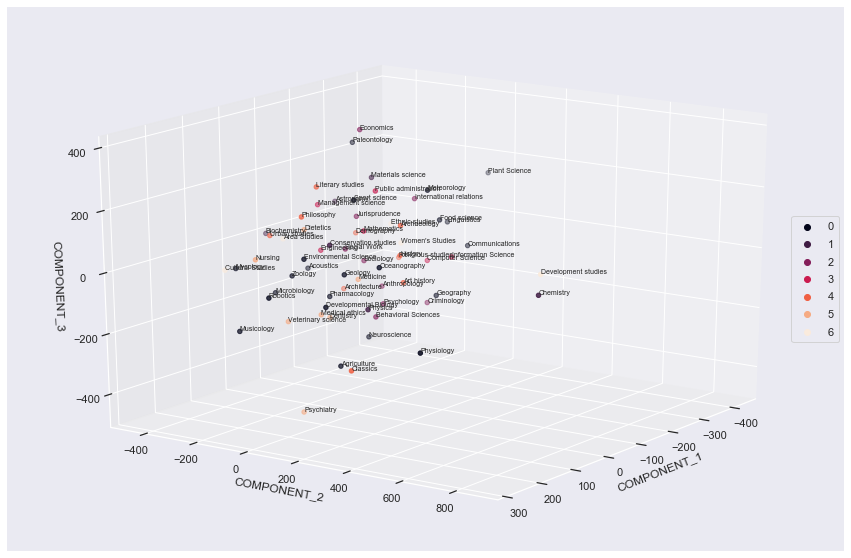

In [76]:
from sklearn.manifold import TSNE
sne = TSNE(n_components = 3)

tsne = sne.fit_transform(svd)

tsne = pd.DataFrame(tsne, columns = ['COMPONENT_1', 'COMPONENT_2', 'COMPONENT_3'])



tsne.index = vecs_df.index

tsne['clusters'] = vecs_df['clusters']

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter3D(tsne['COMPONENT_1'], tsne['COMPONENT_2'], tsne['COMPONENT_3'], c = tsne['clusters'], s = 20)
plt.legend(*sc.legend_elements(), loc = "right")

ax.set_xlabel('COMPONENT_1')
ax.set_ylabel('COMPONENT_2')
ax.set_zlabel('COMPONENT_3')


for i in range(len(vecs_df)):
    ax.text(tsne['COMPONENT_1'][i]+0.015, tsne['COMPONENT_2'][i]+0.015, tsne['COMPONENT_3'][i]+0.015, tsne.index[i], fontsize = 'xx-small')

ax.view_init(20, 35)

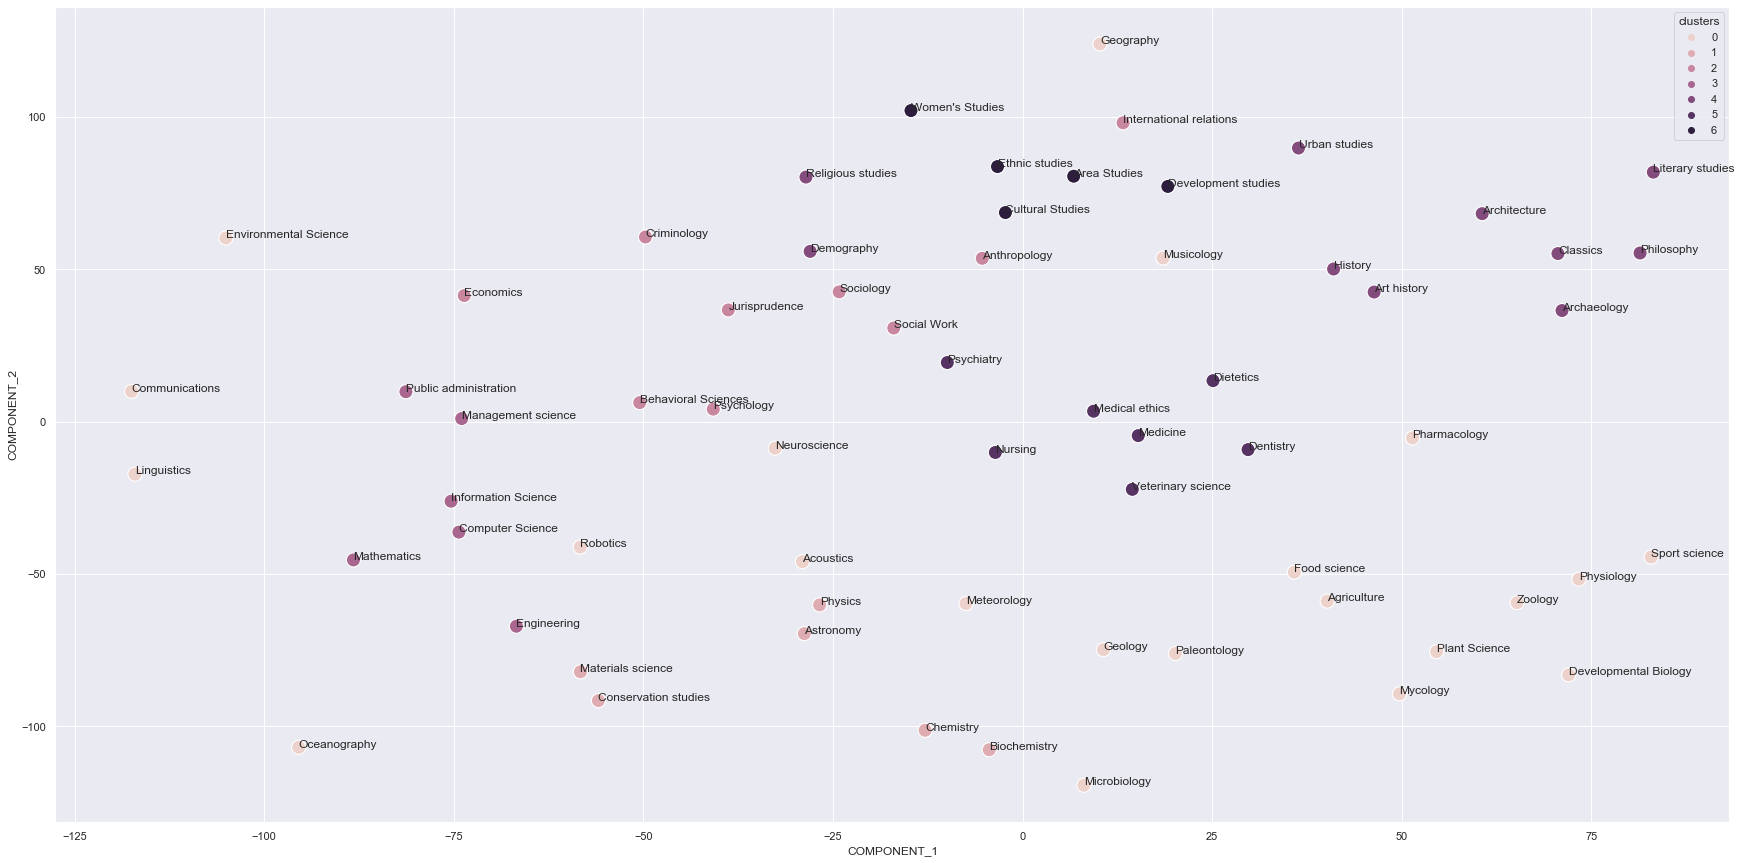

In [84]:
from sklearn.manifold import TSNE
sne = TSNE(n_components = 2, perplexity = 7, early_exaggeration = 4)

tsne = sne.fit_transform(svd)

tsne = pd.DataFrame(tsne, columns = ['COMPONENT_1', 'COMPONENT_2'])



tsne.index = vecs_df.index

tsne['clusters'] = vecs_df['clusters']

plt.figure(figsize=(30,15))

sns.scatterplot(x = 'COMPONENT_1', y = 'COMPONENT_2', hue = 'clusters', s = 200,  data = tsne)

for i in range(len(tsne)):
    plt.annotate(tsne.index[i], (tsne['COMPONENT_1'][i]+0.003, tsne['COMPONENT_2'][i]+0.003))



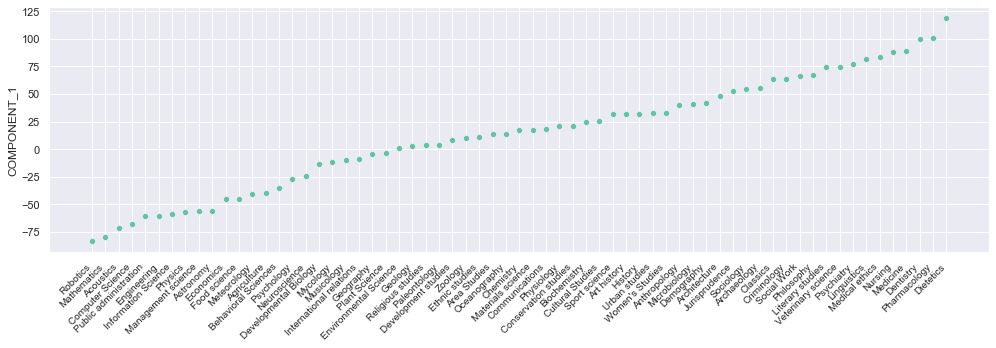

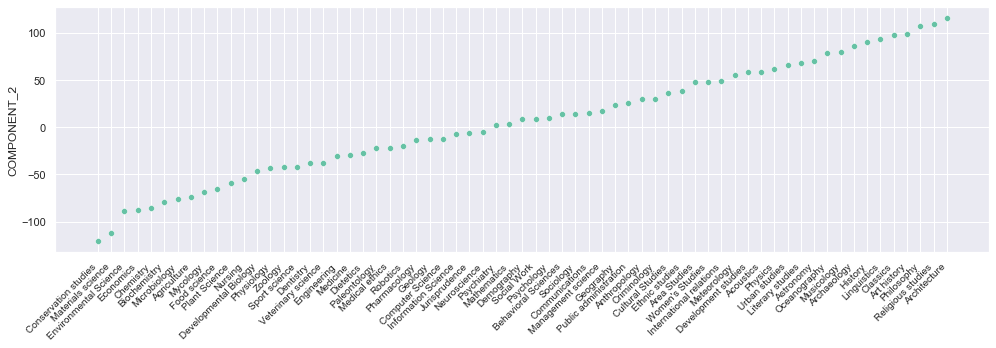

In [82]:
for i in ['COMPONENT_1', 'COMPONENT_2']:
    PC = tsne[[i, 'clusters']]
    PC = PC.sort_values(by = i)
    plt.figure(figsize=(14,5))
    sns.set_palette("Set2")
    sns.scatterplot(x = PC.index, y = PC[i])
    plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
    plt.tight_layout()

In [73]:
tsne['clusters'] = vecs_df['clusters']

Architecture         NaN
Agriculture          NaN
Astronomy            NaN
Archaeology          NaN
Acoustics            NaN
                      ..
Plant Science        NaN
Psychiatry           NaN
Sport science        NaN
Veterinary science   NaN
Zoology              NaN
Name: clusters, Length: 65, dtype: float64

In [74]:
vecs_df['clusters']

Architecture          4
Agriculture           0
Astronomy             1
Archaeology           4
Acoustics             0
                     ..
Plant Science         0
Psychiatry            5
Sport science         0
Veterinary science    5
Zoology               0
Name: clusters, Length: 65, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

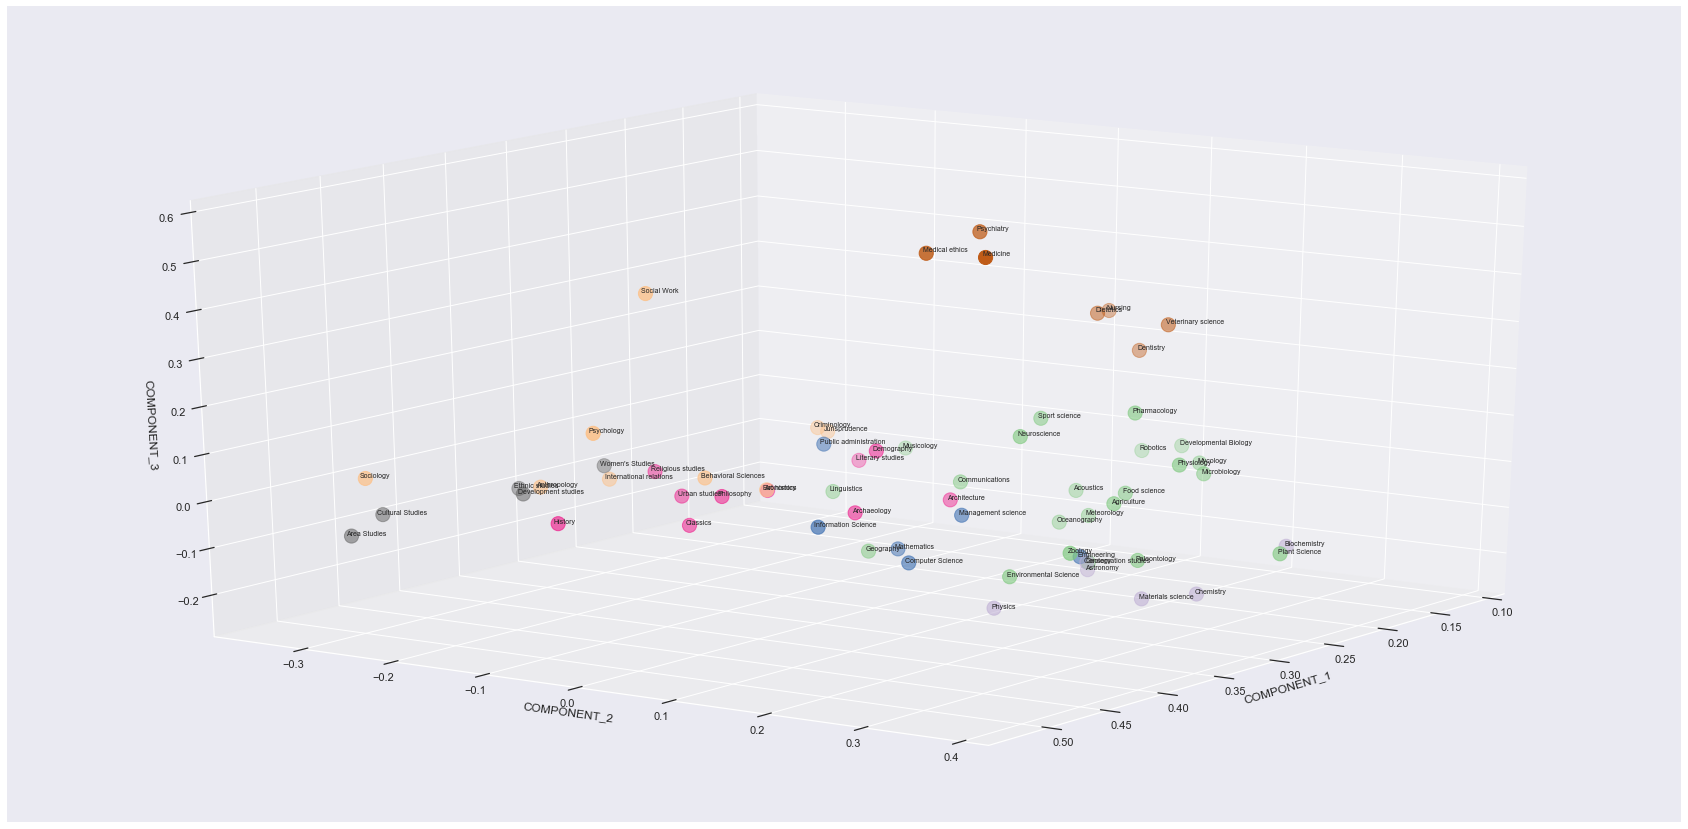

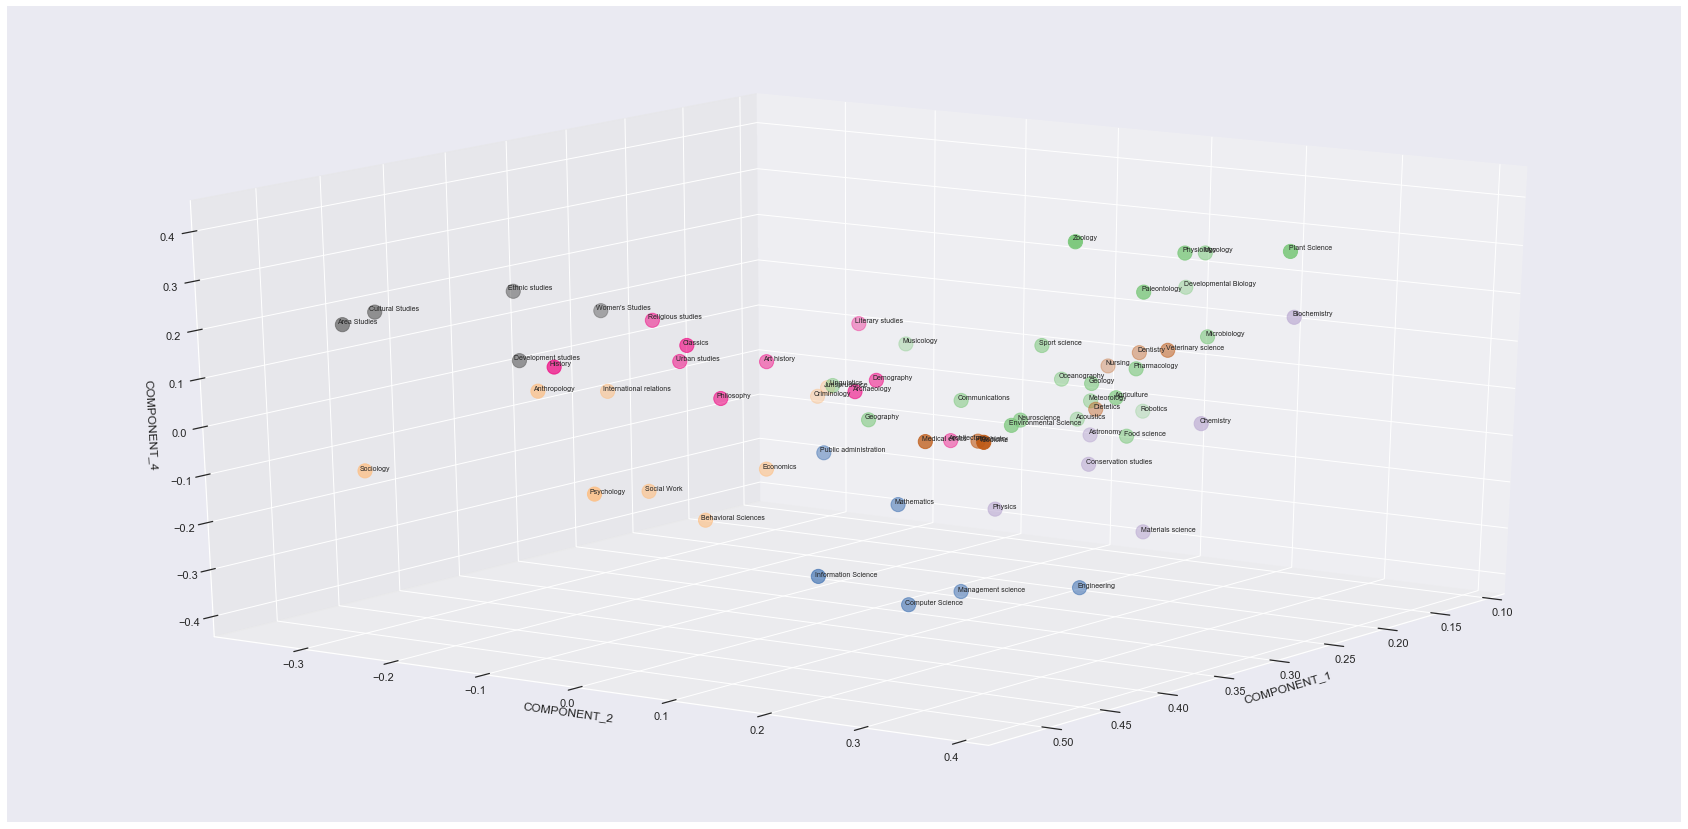

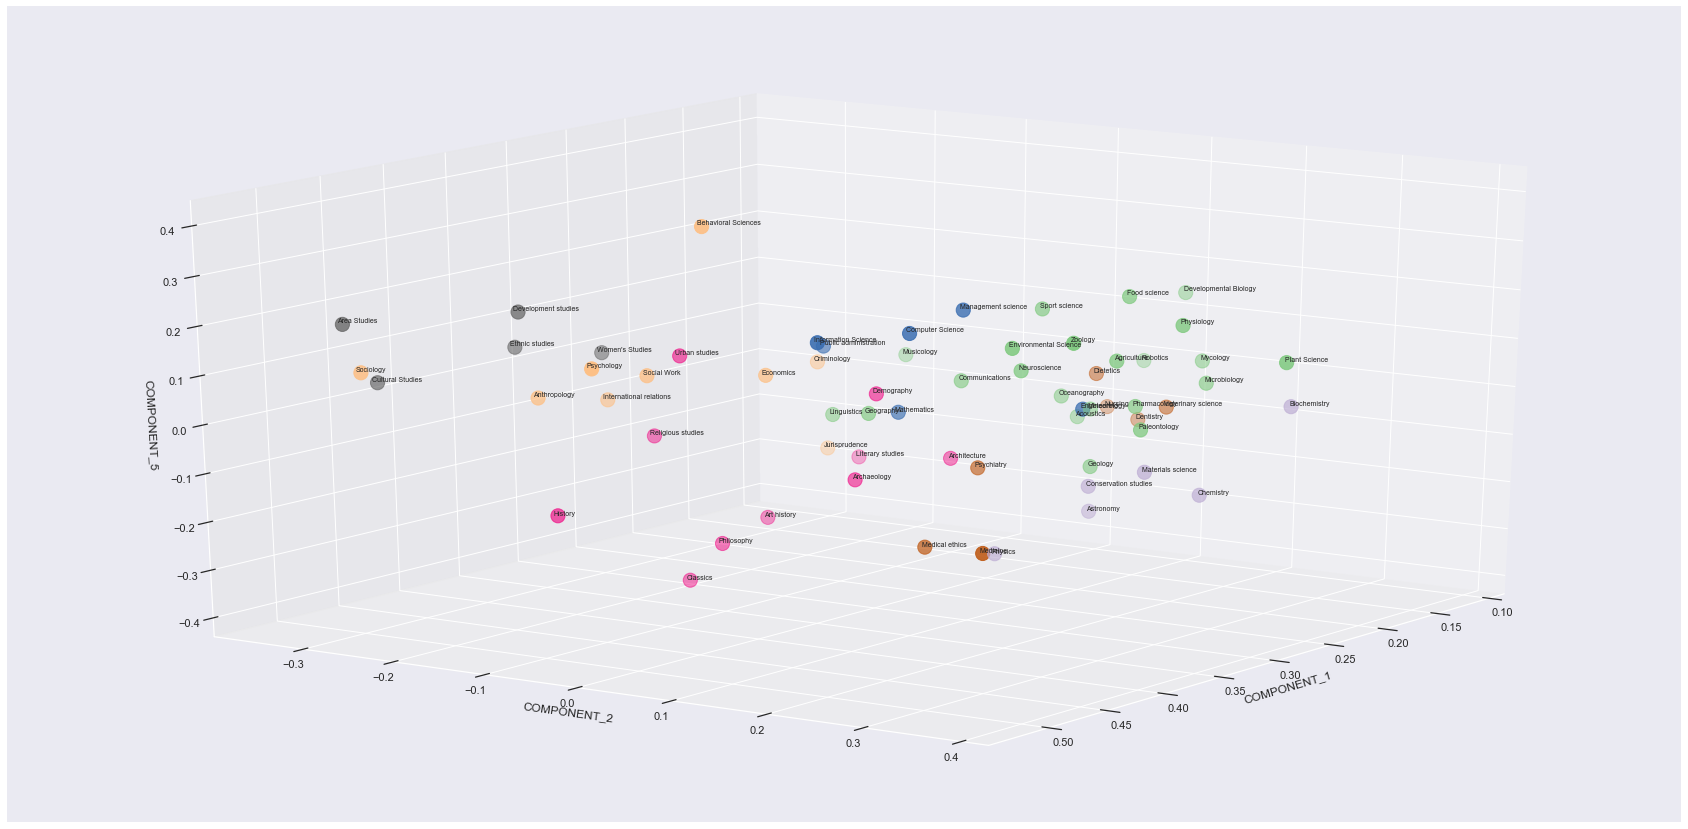

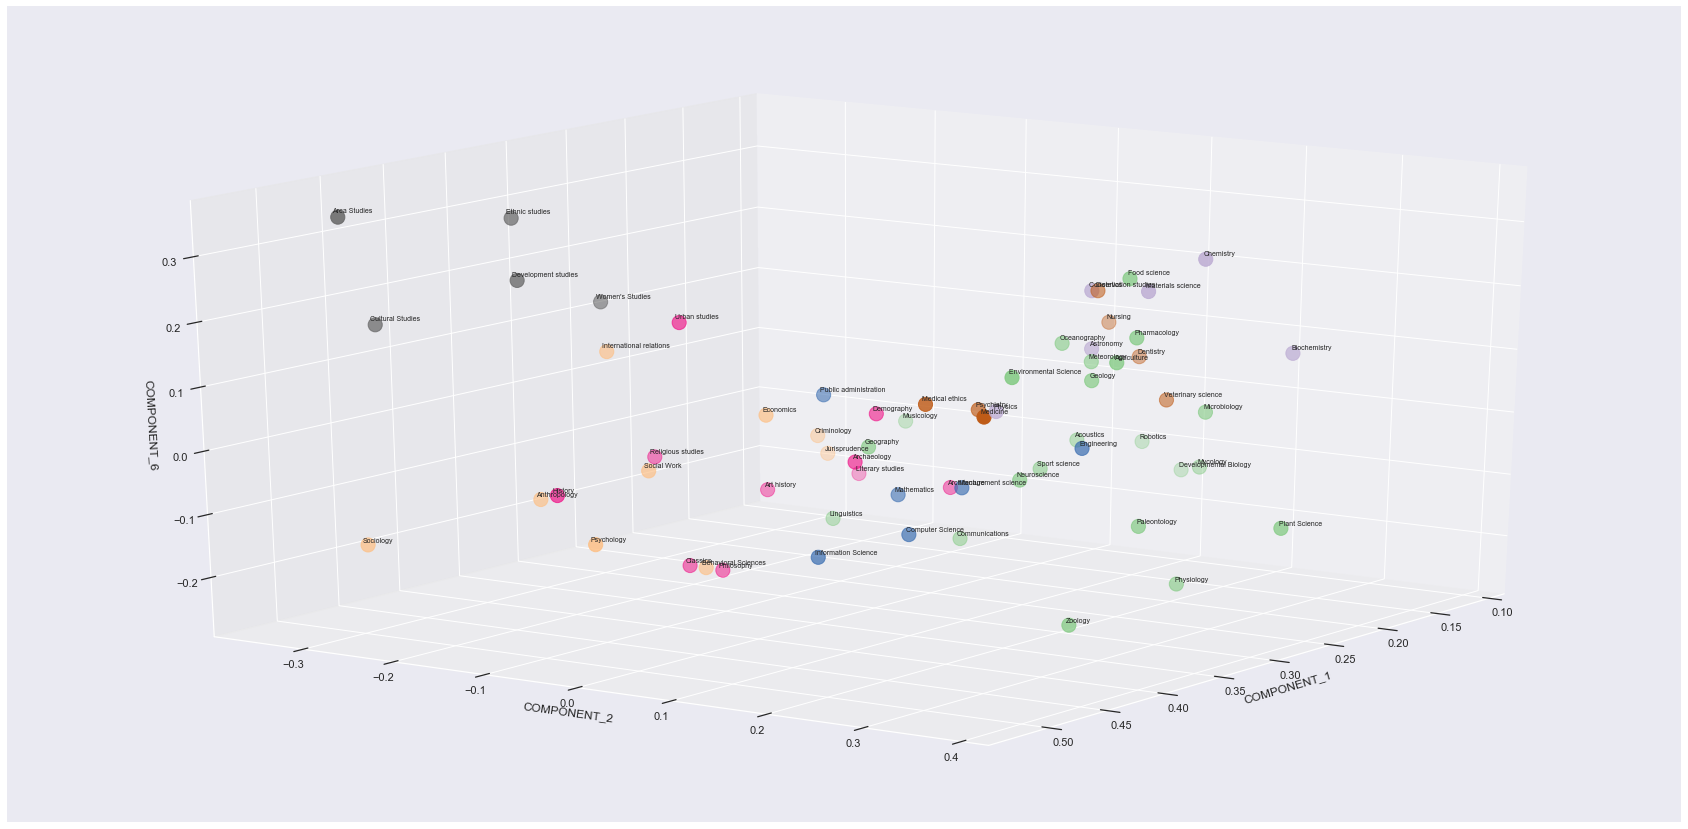

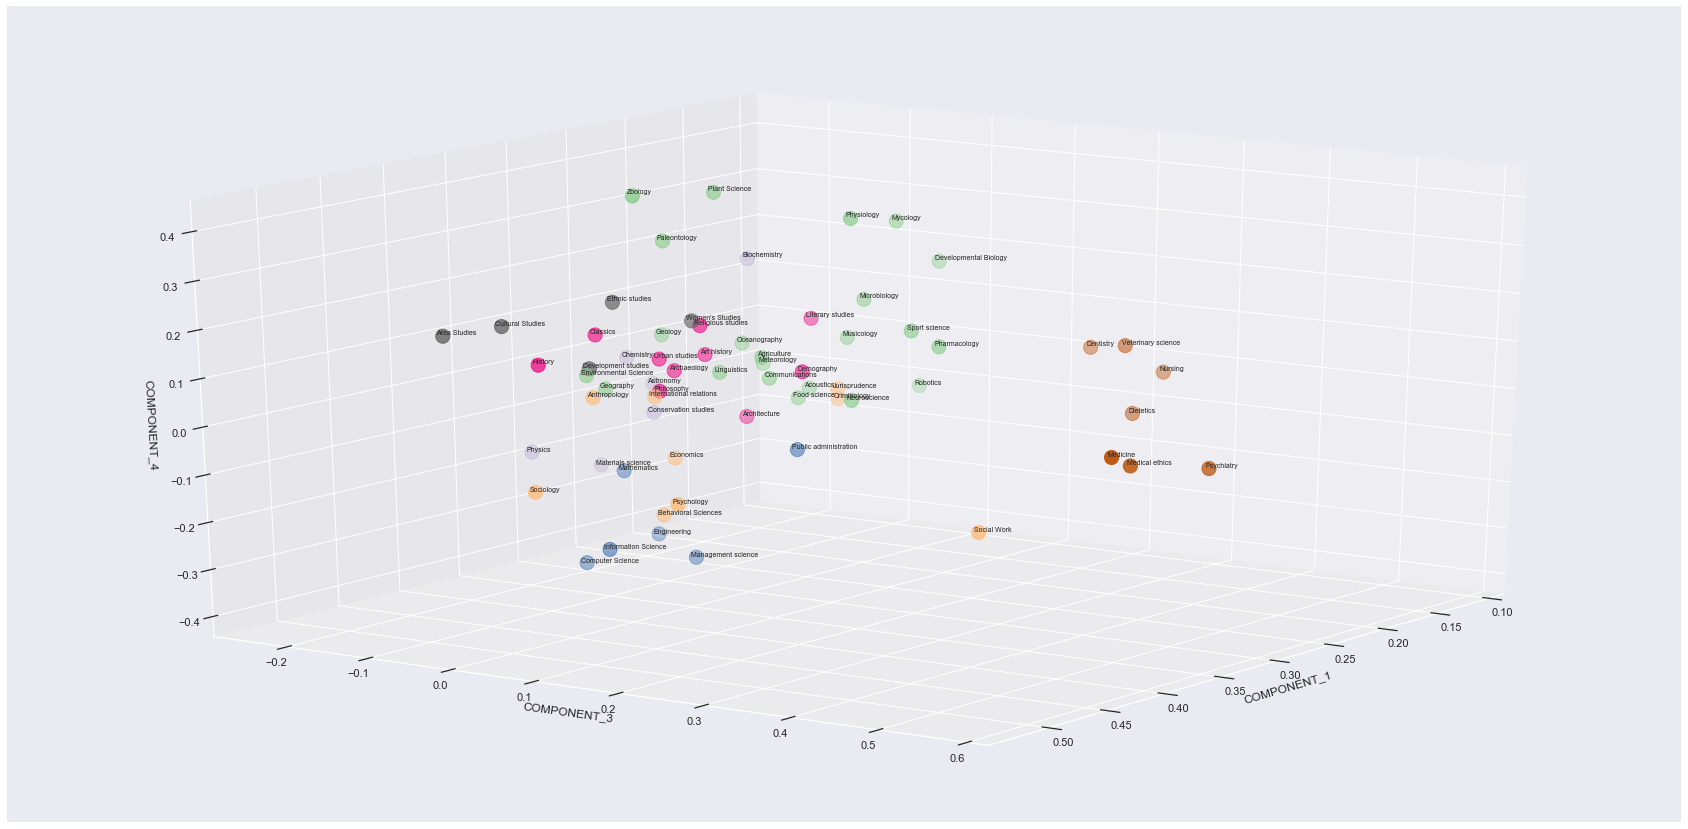

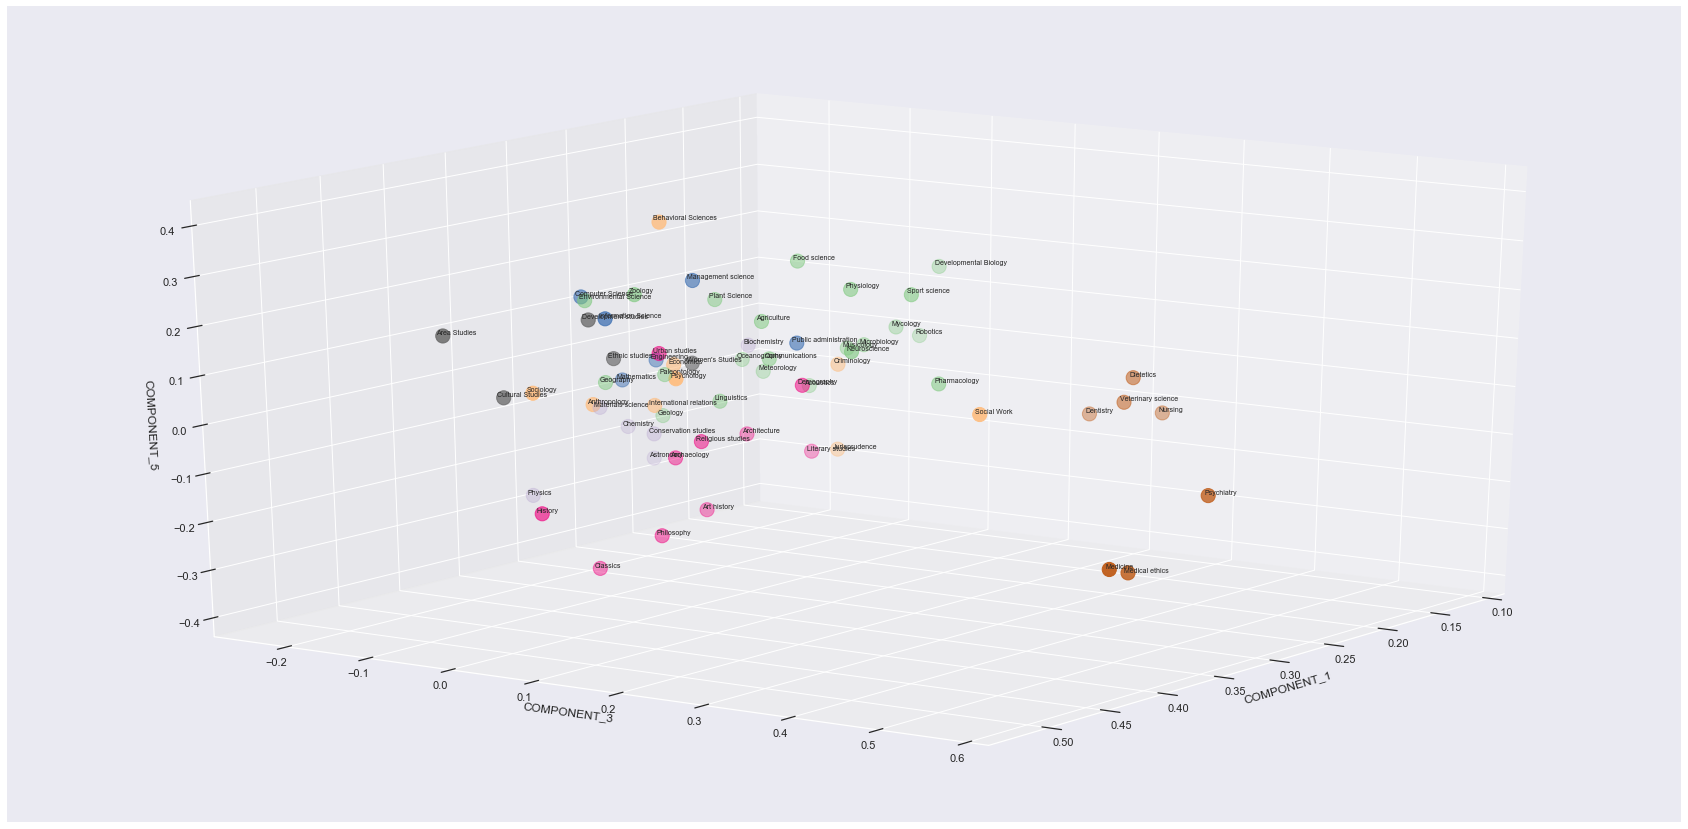

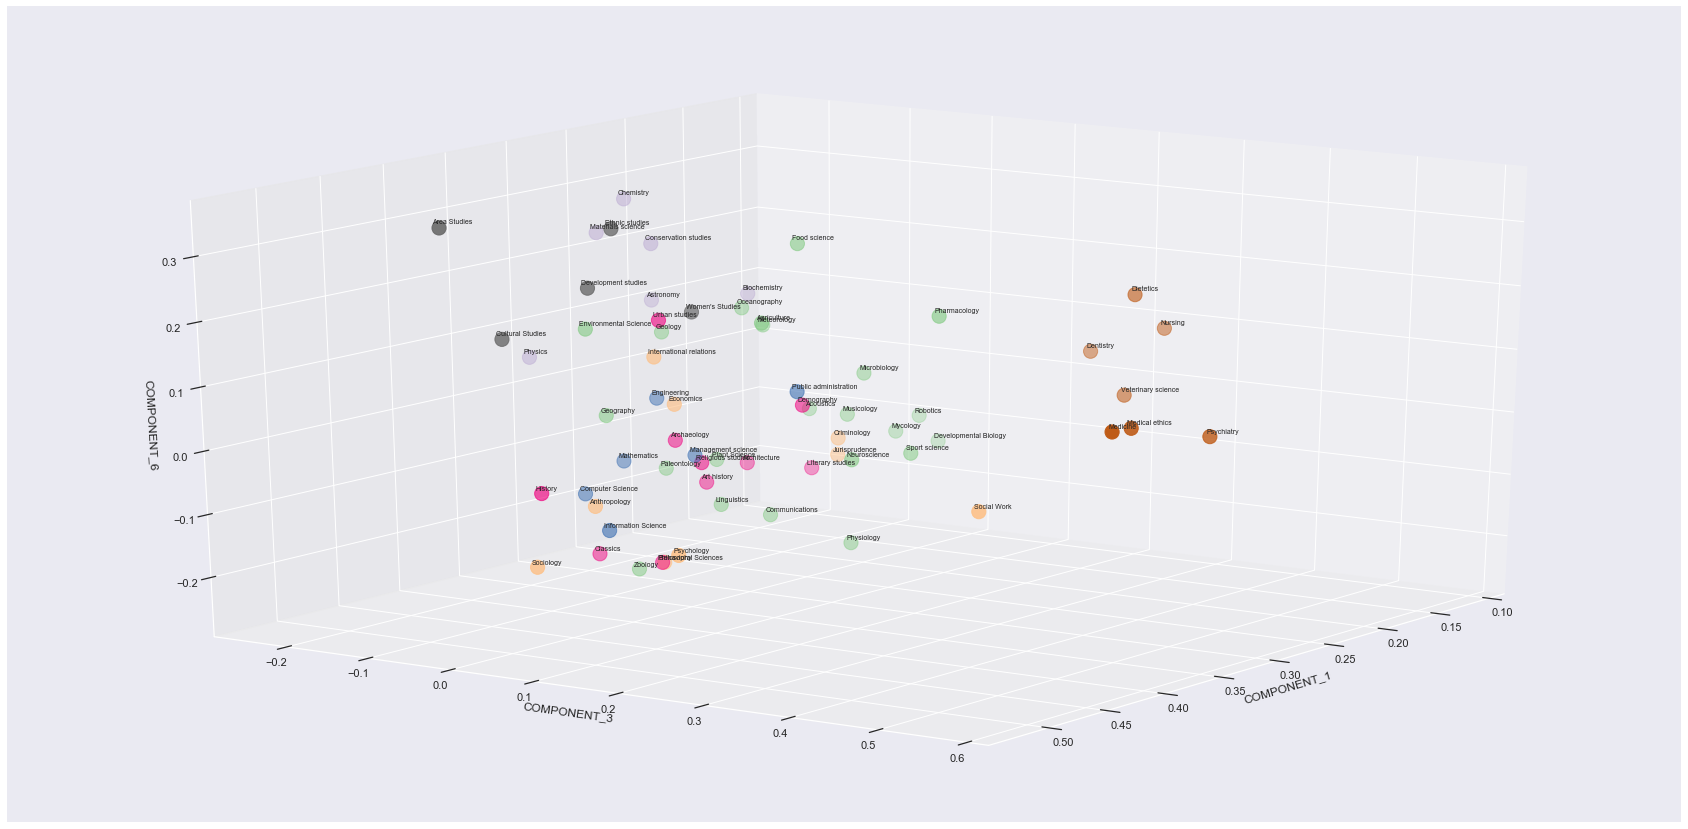

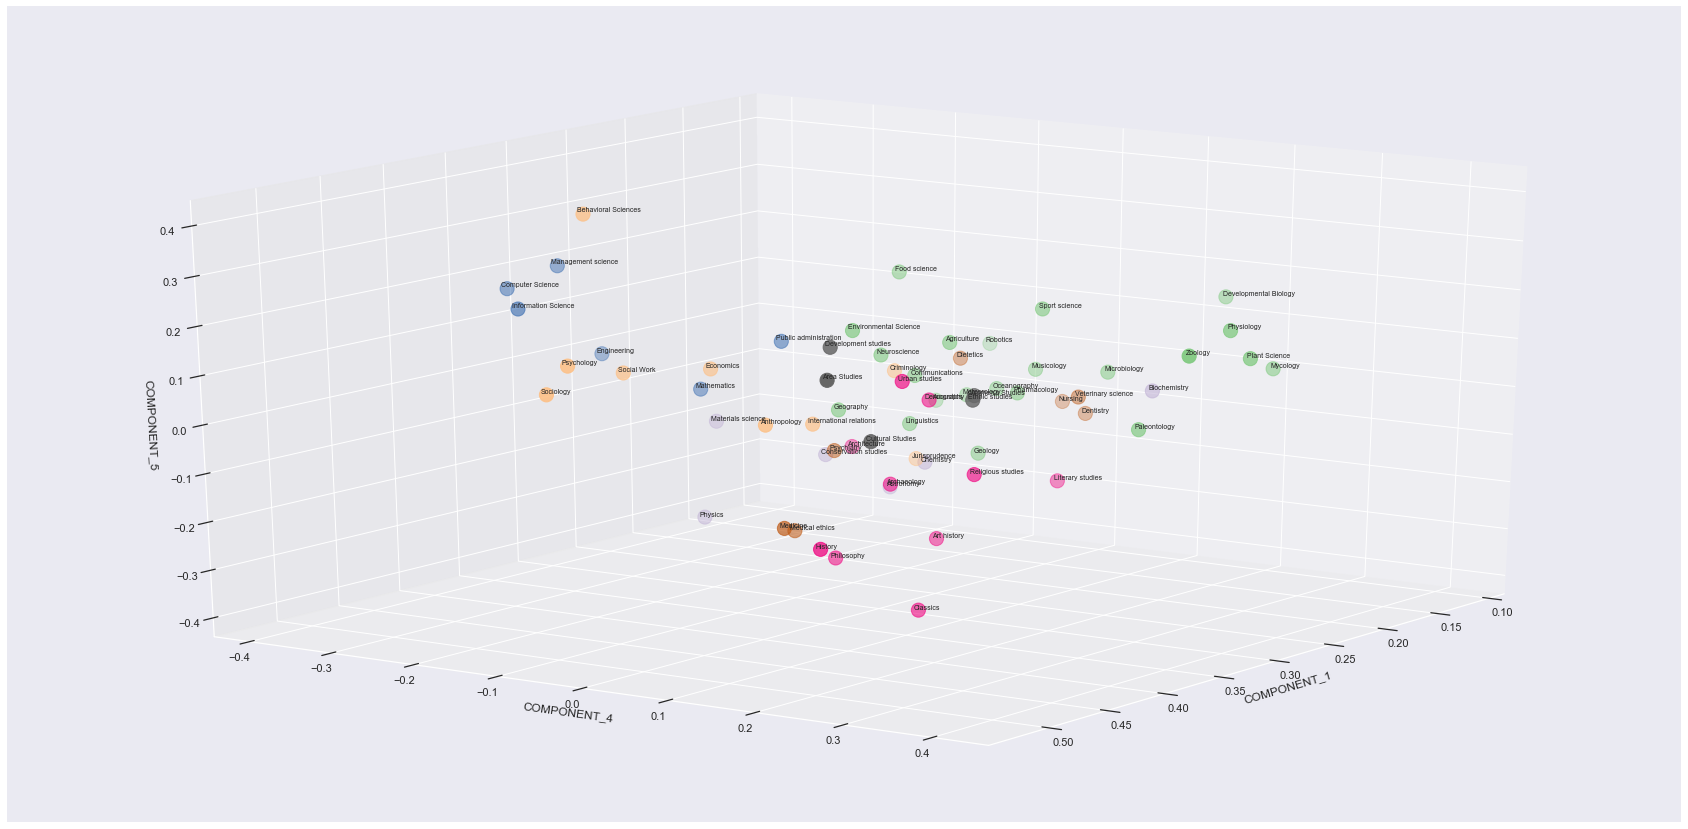

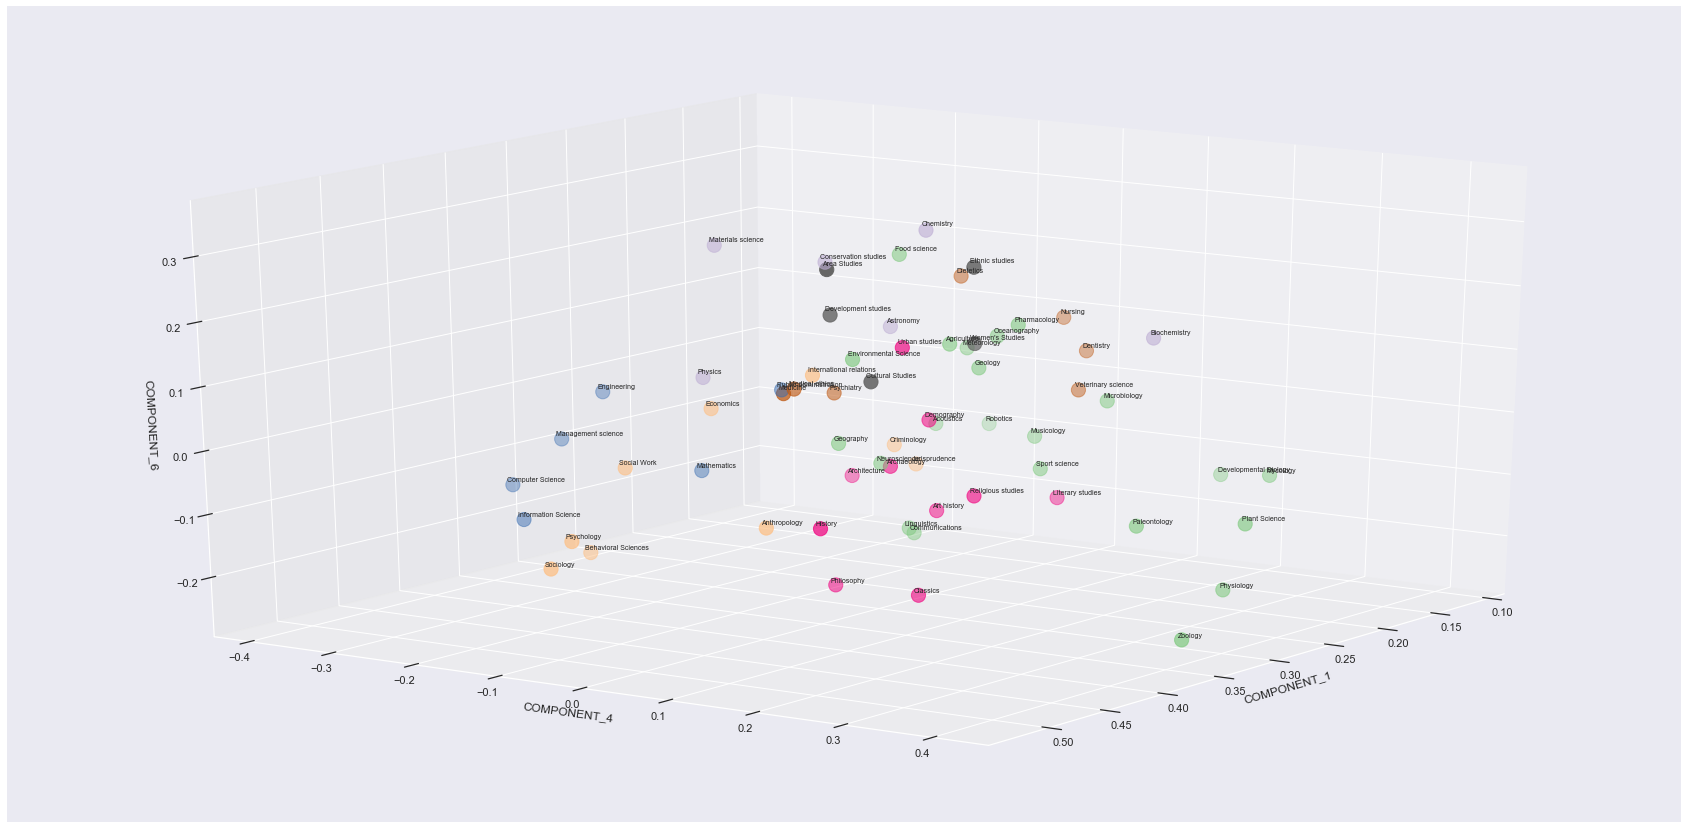

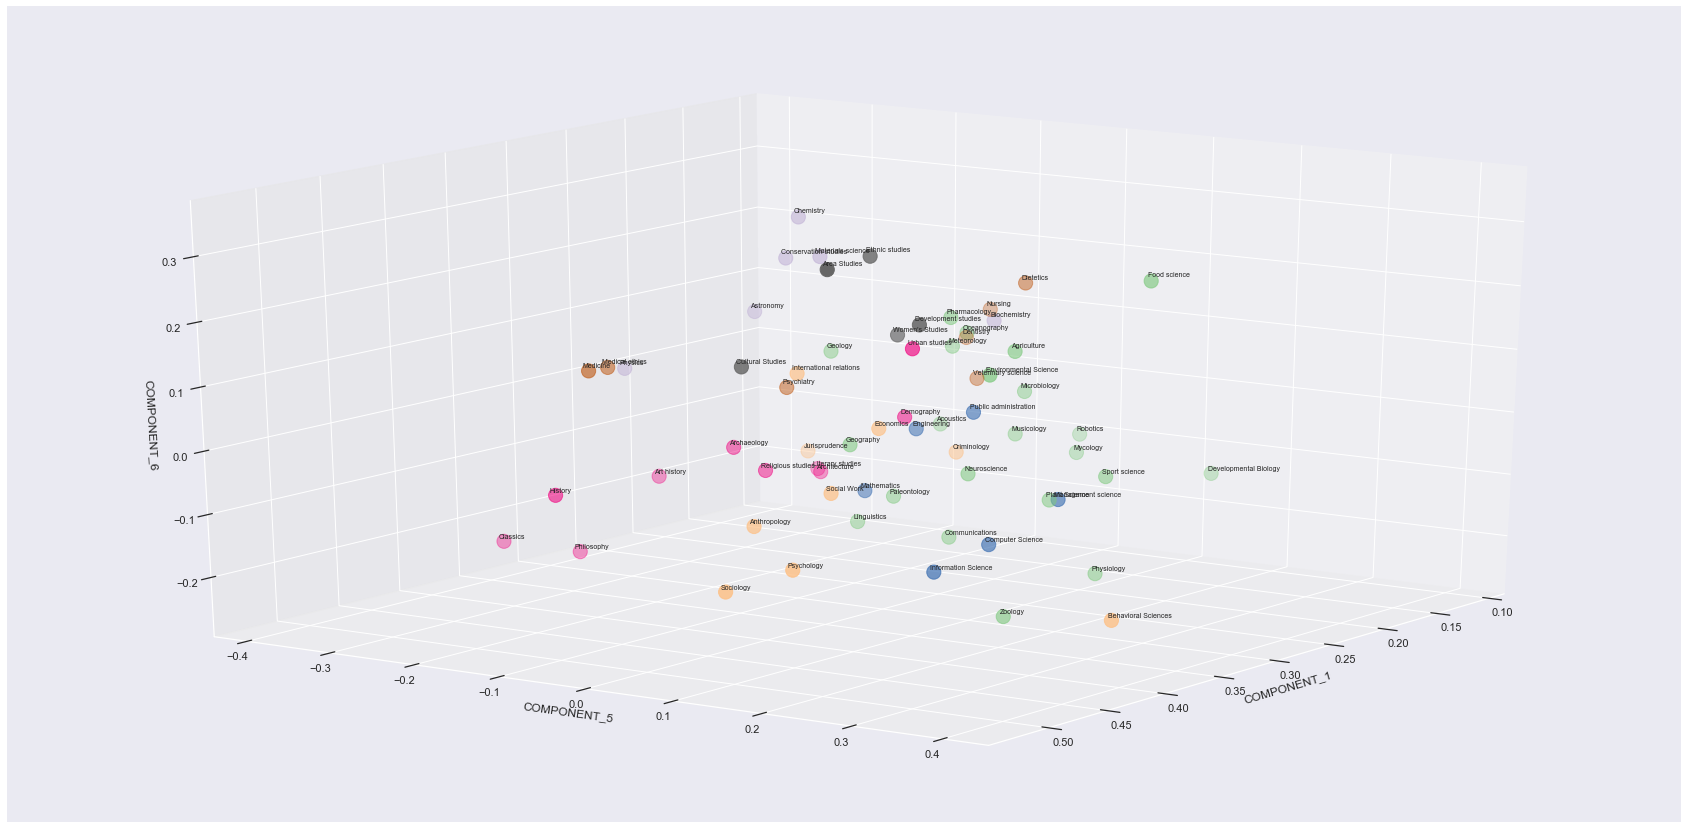

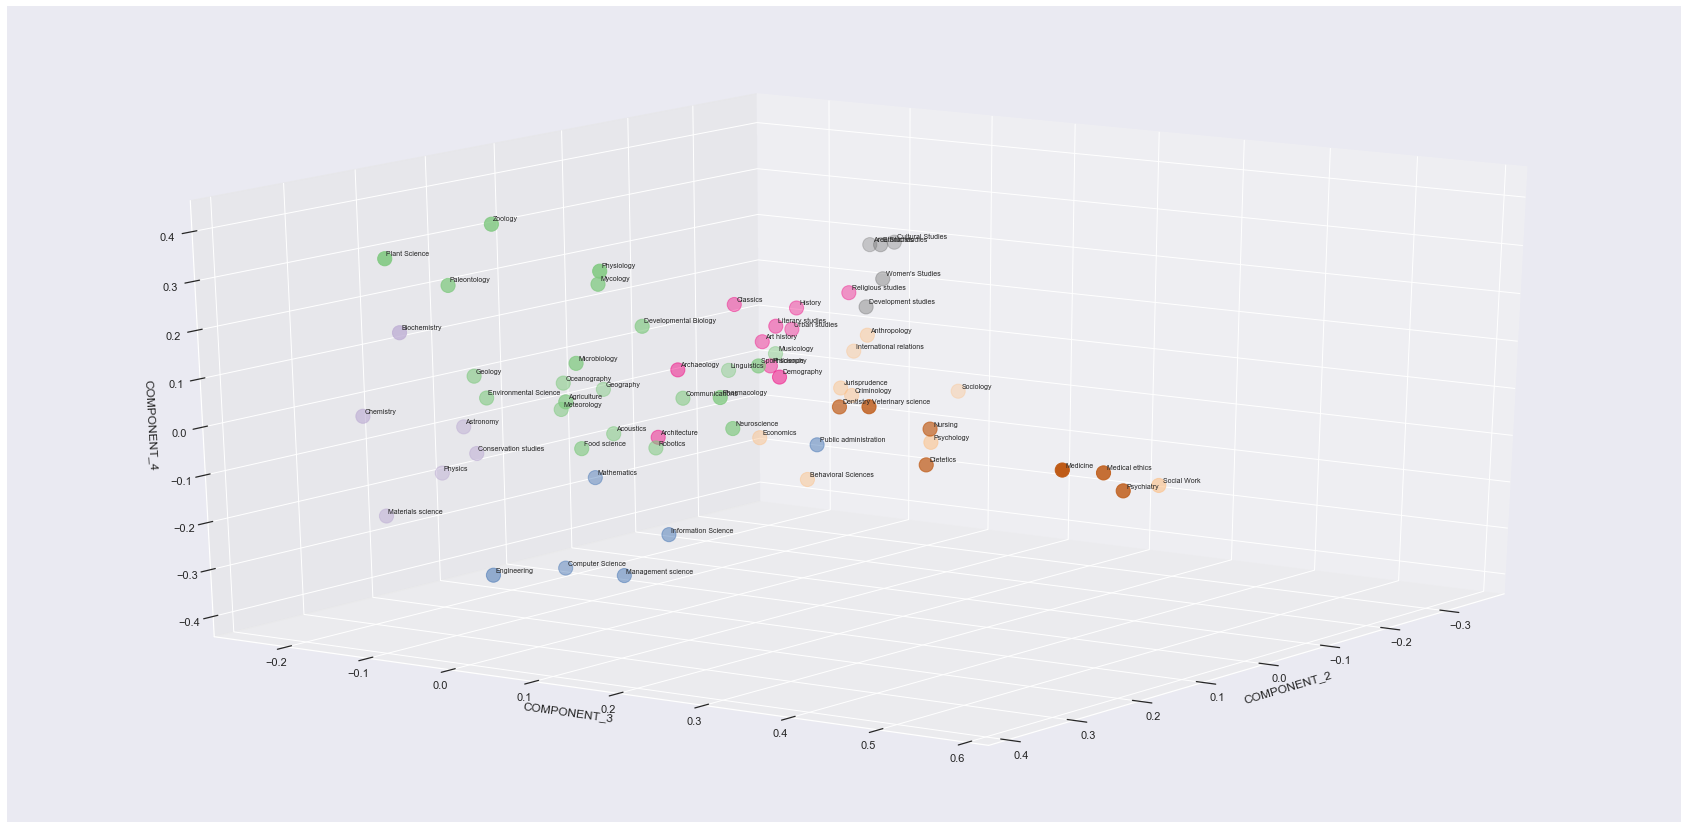

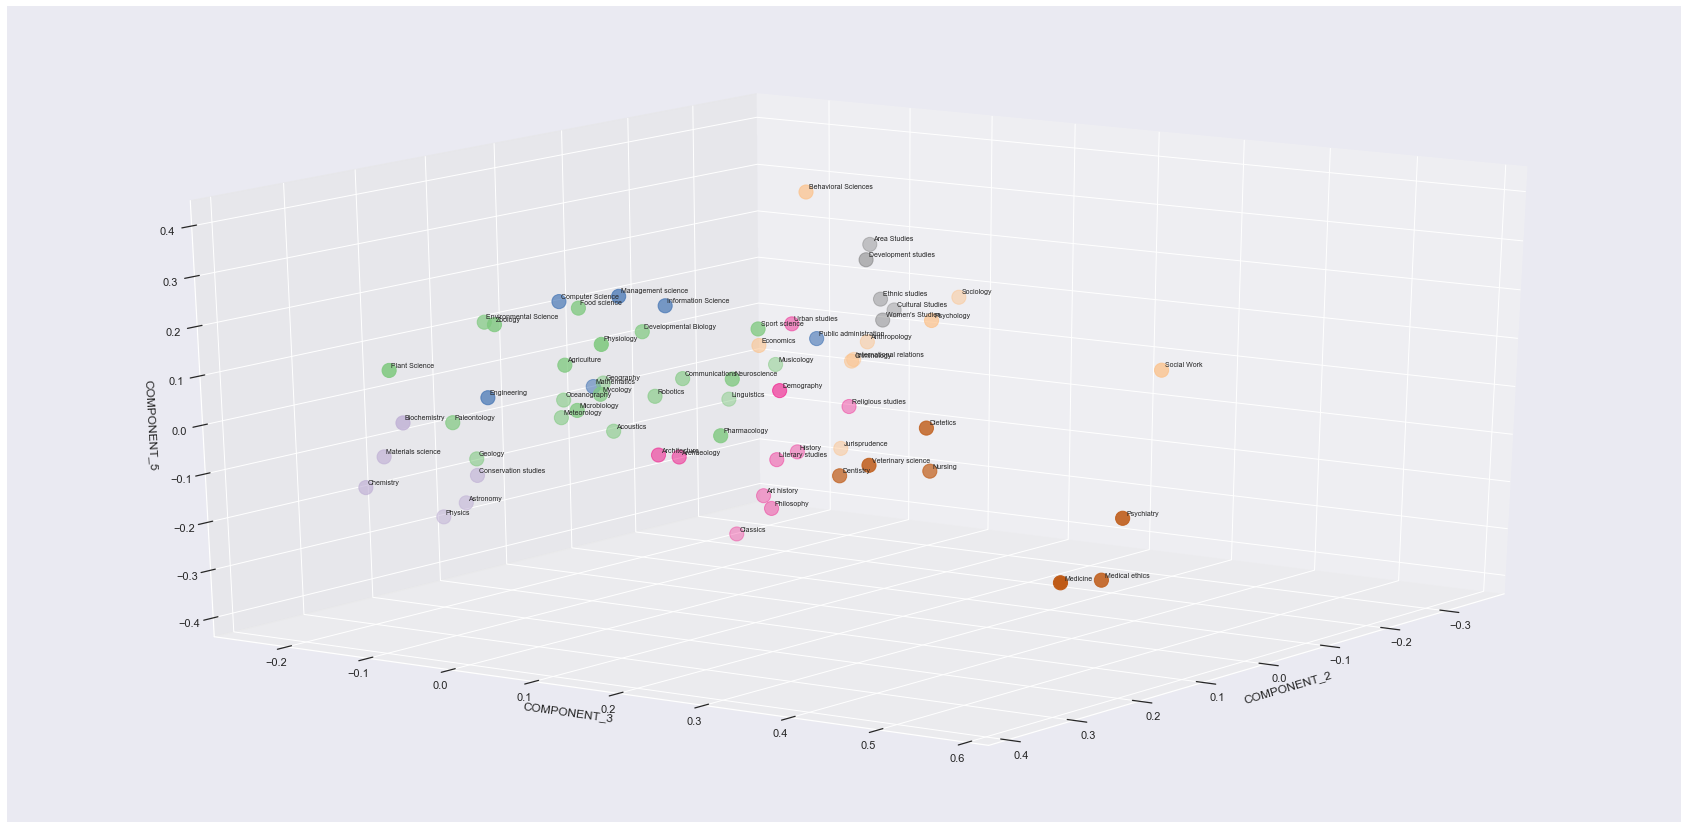

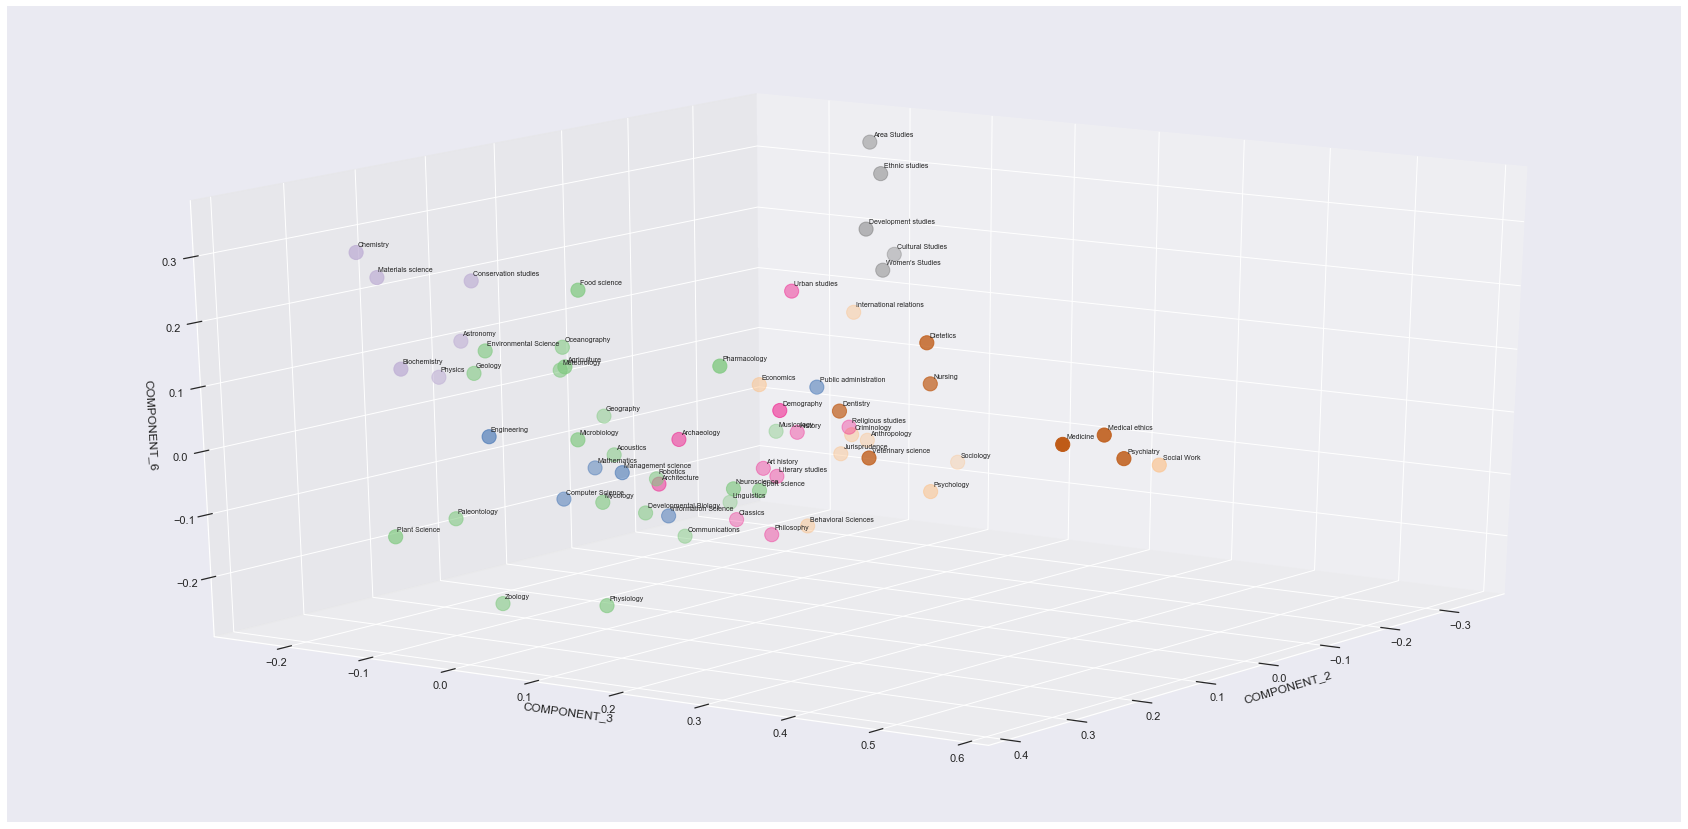

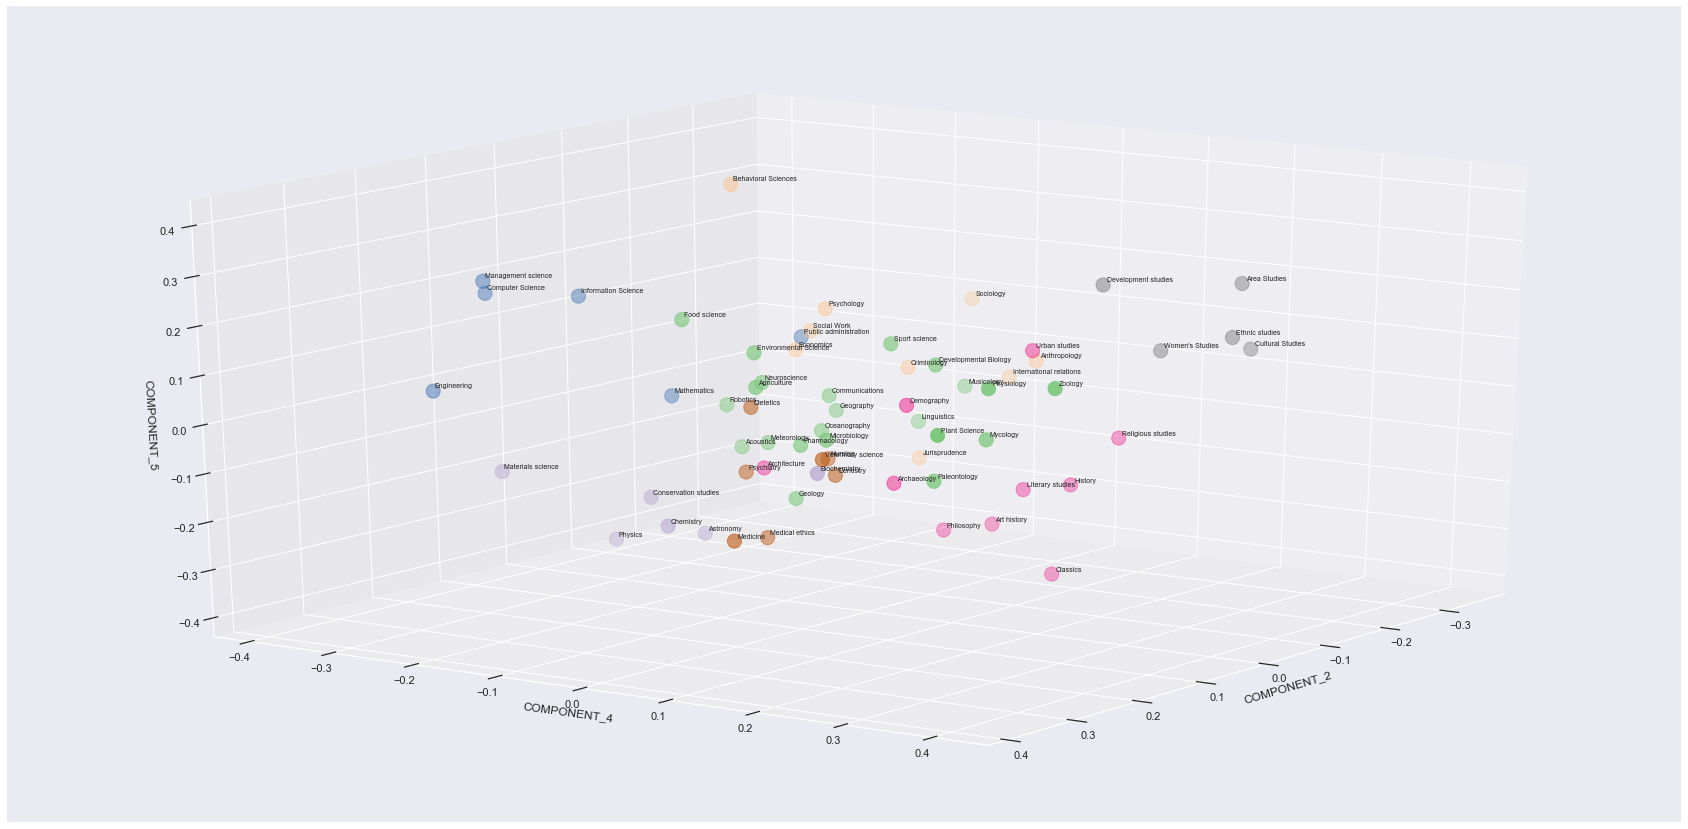

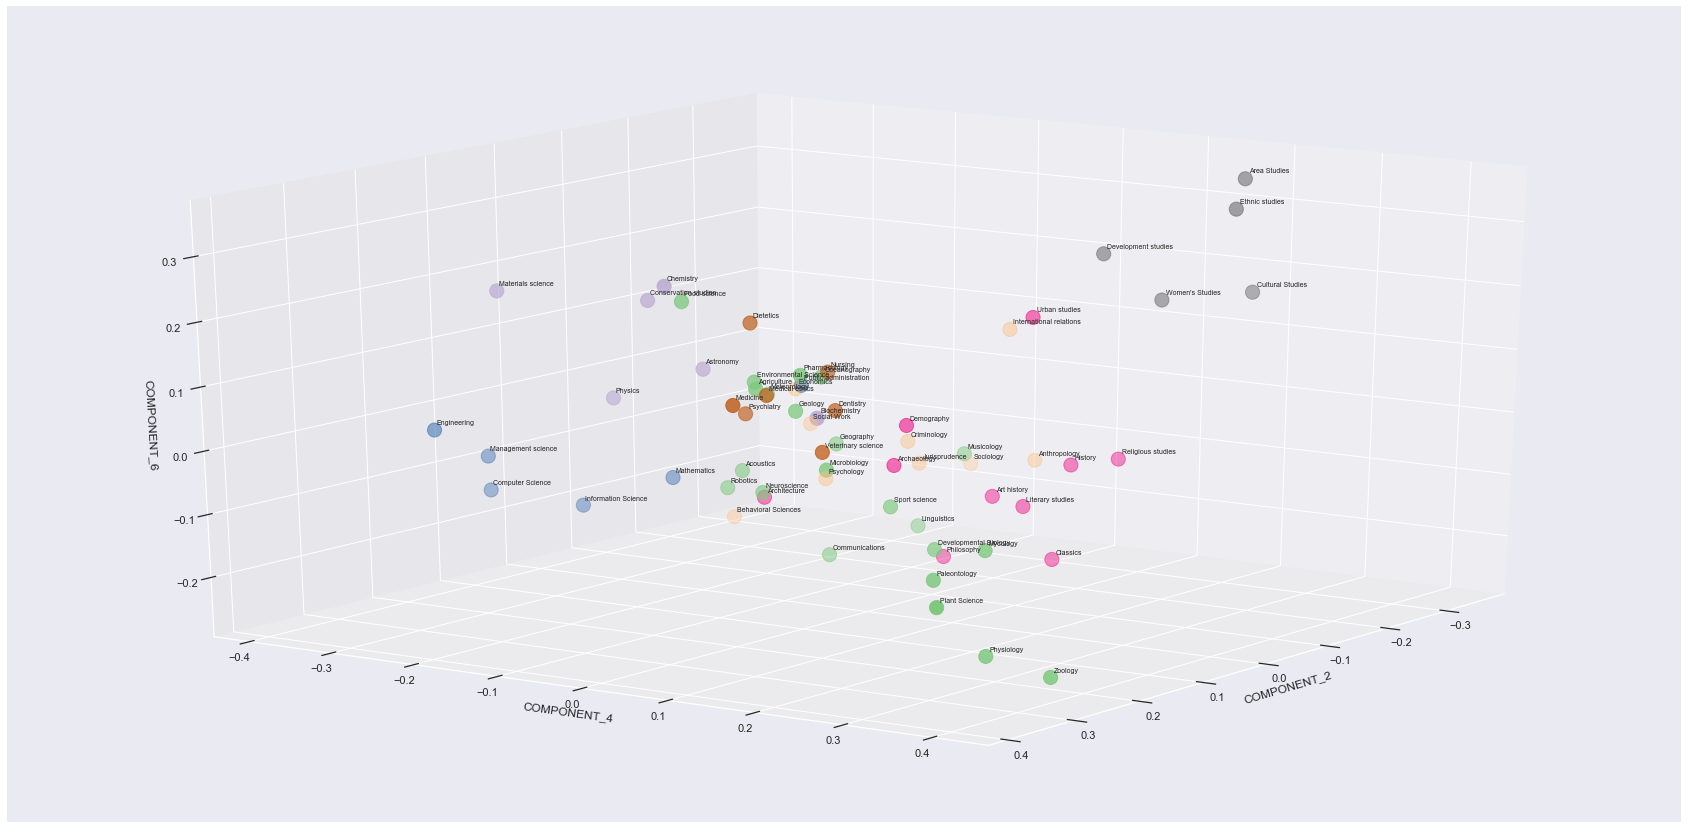

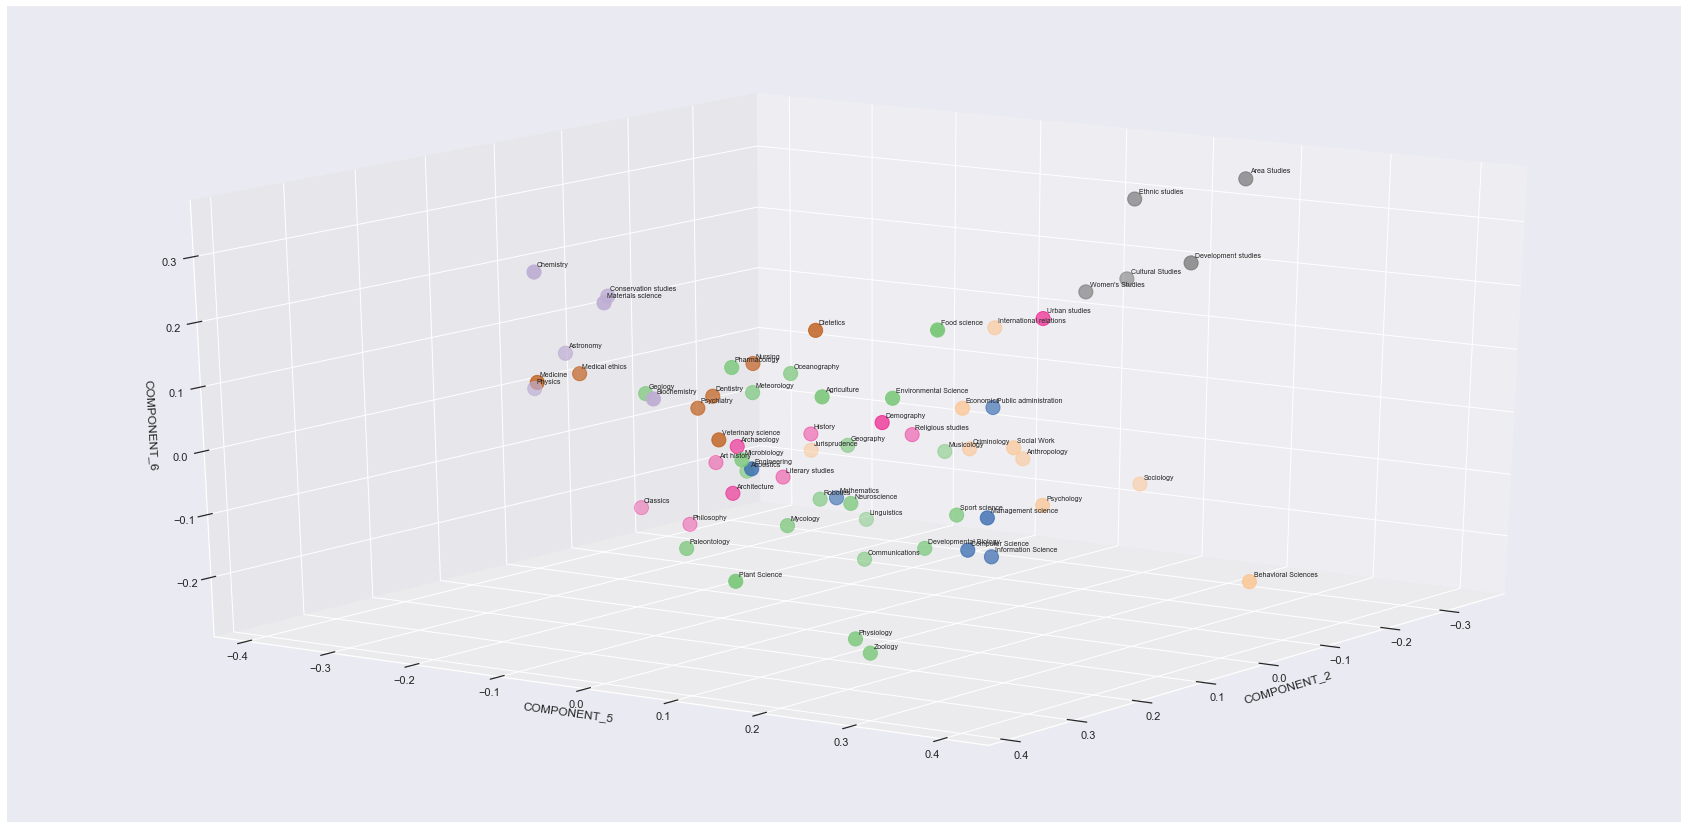

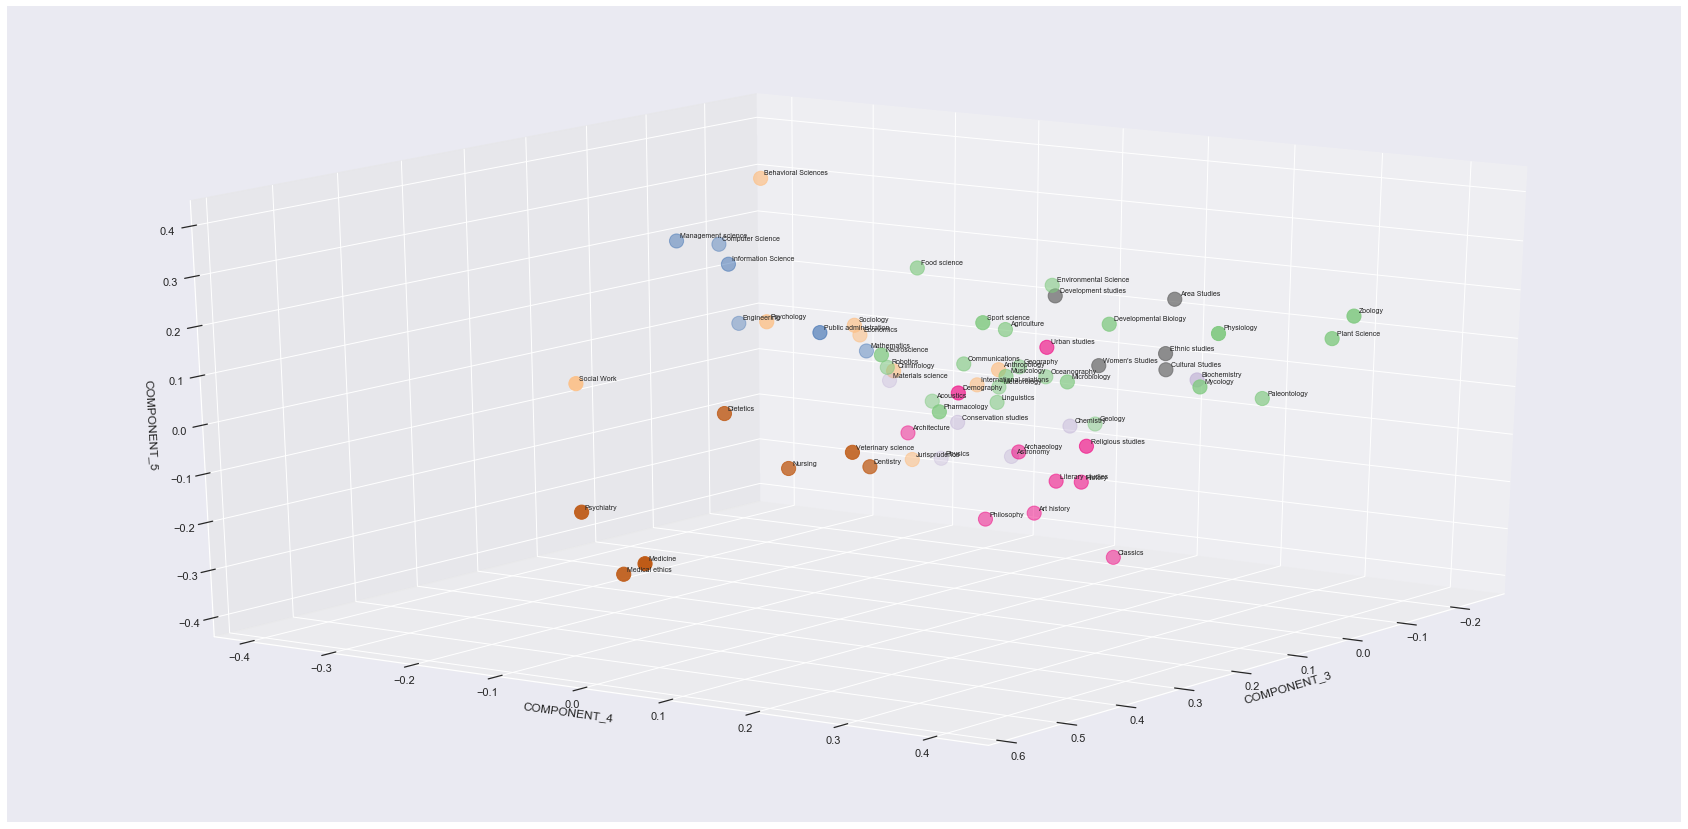

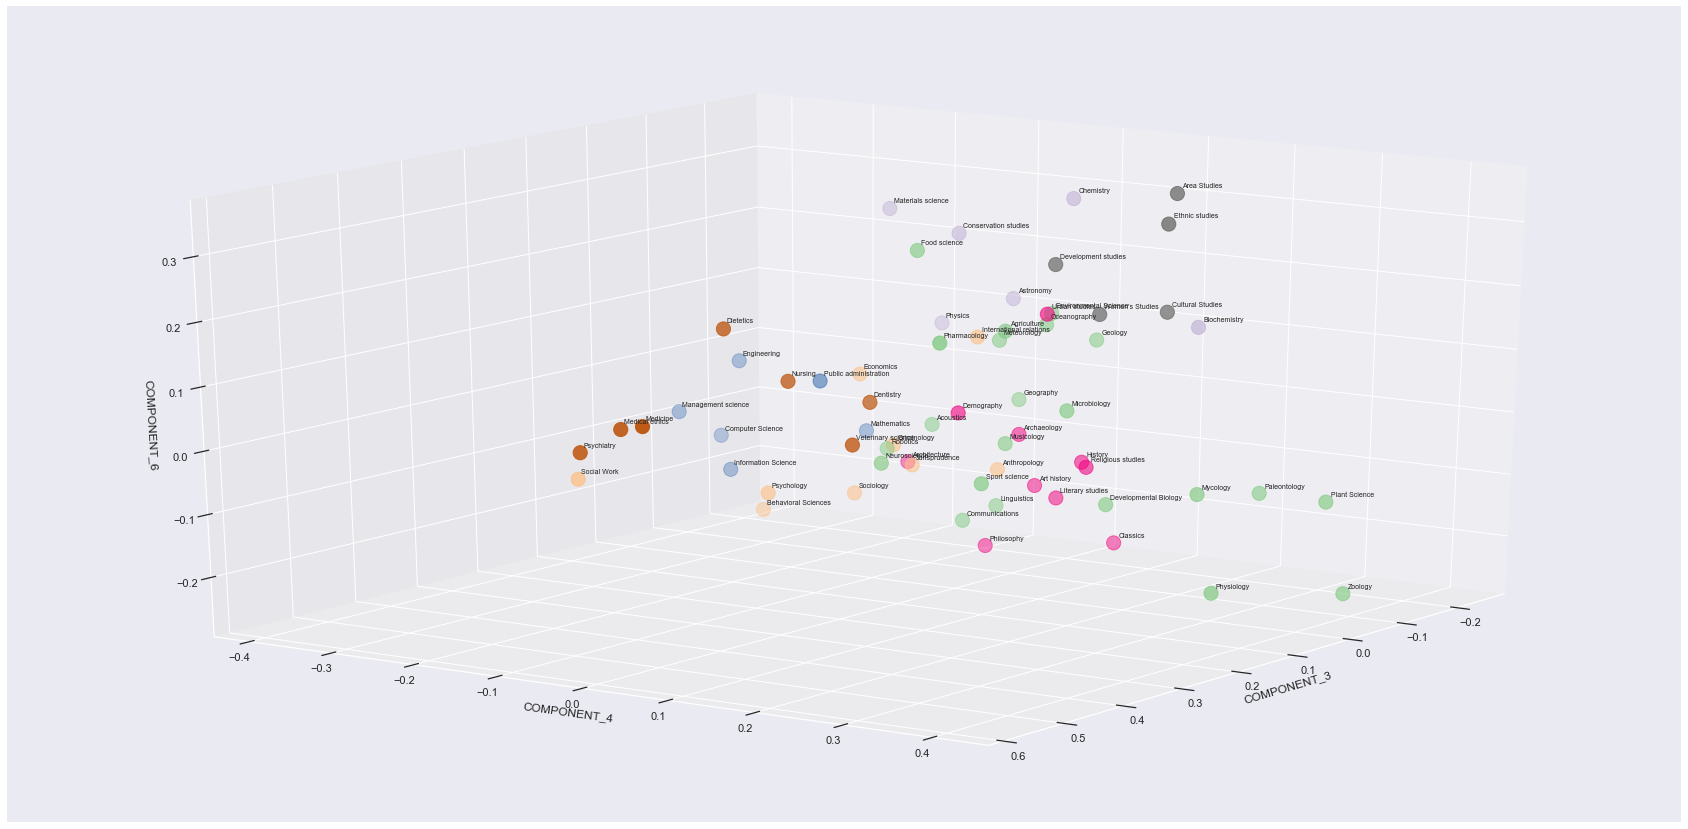

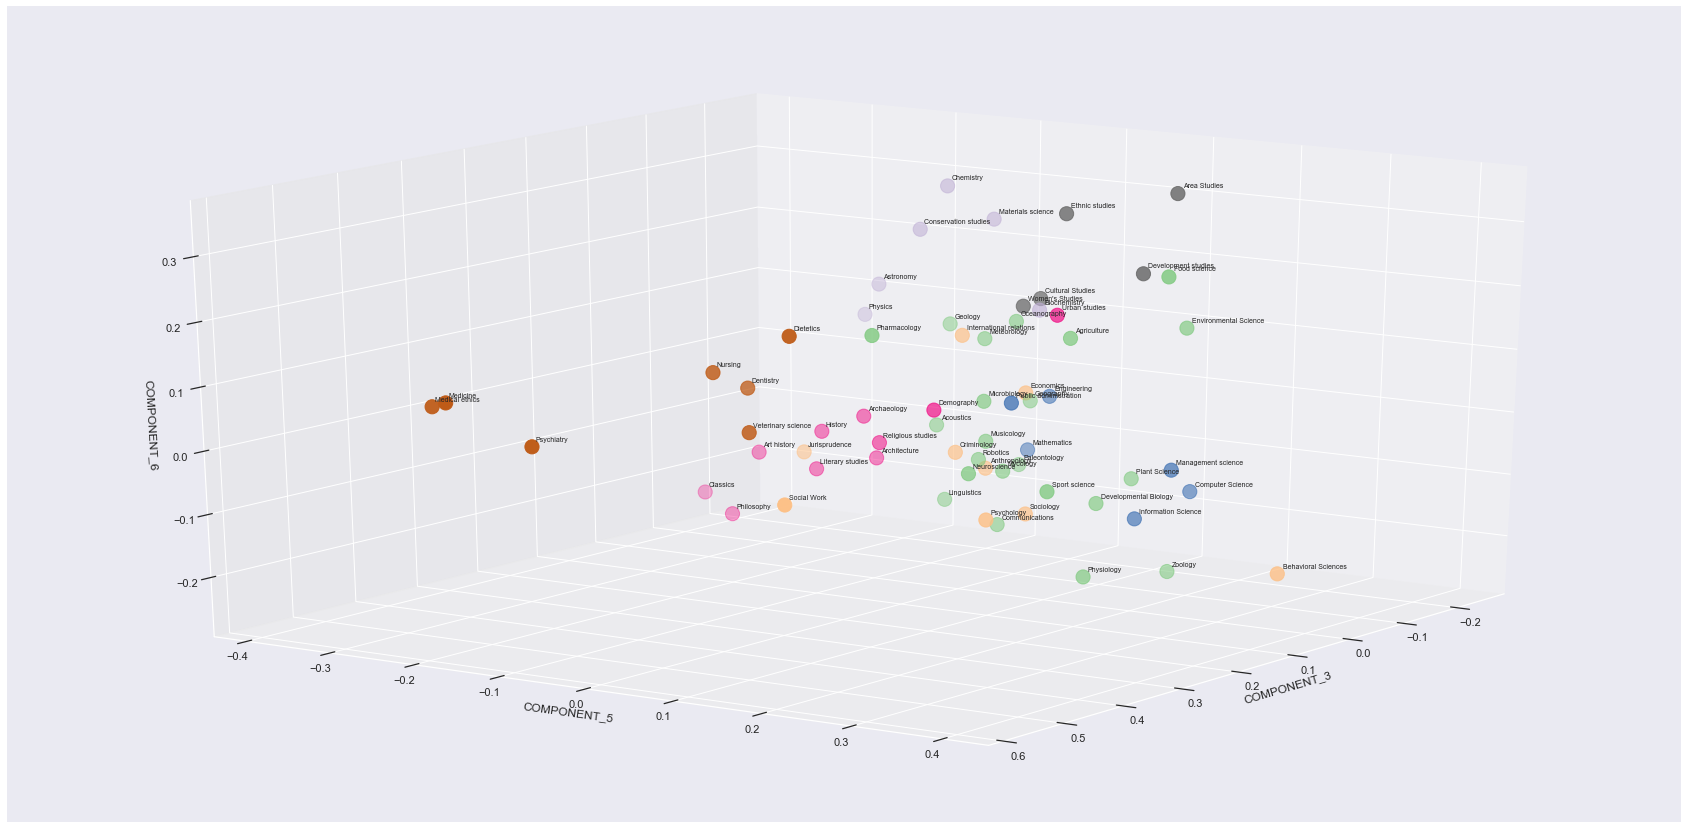

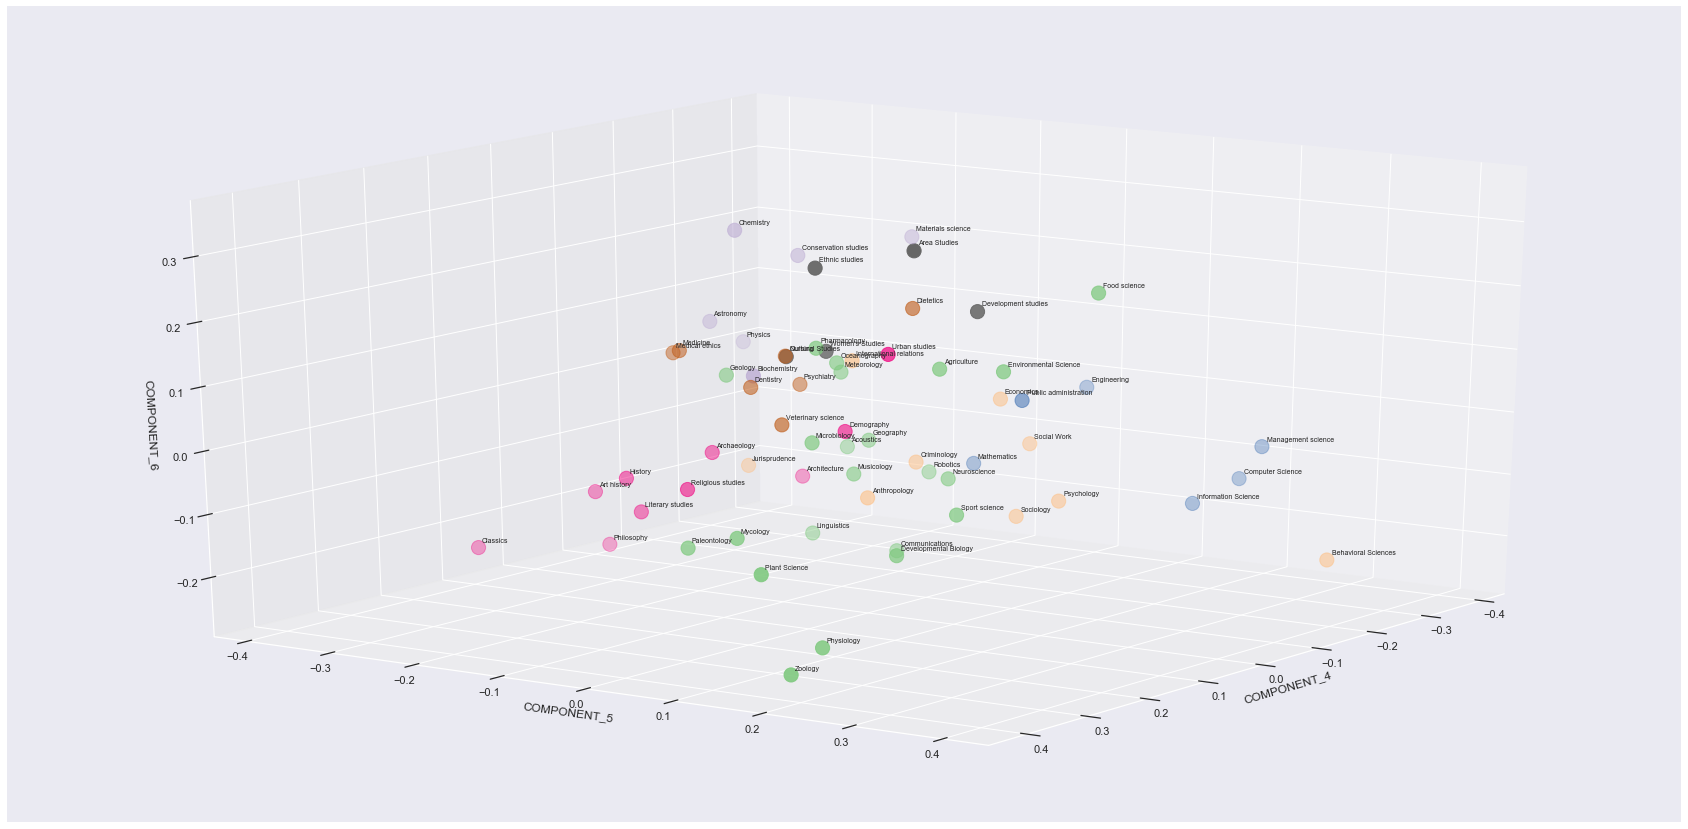

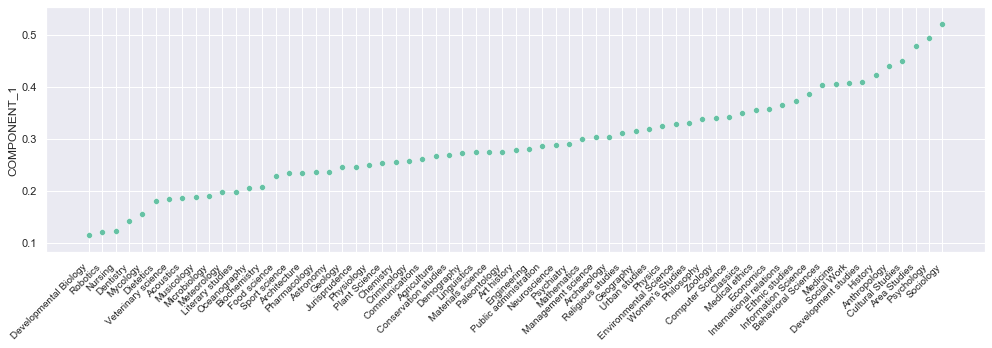

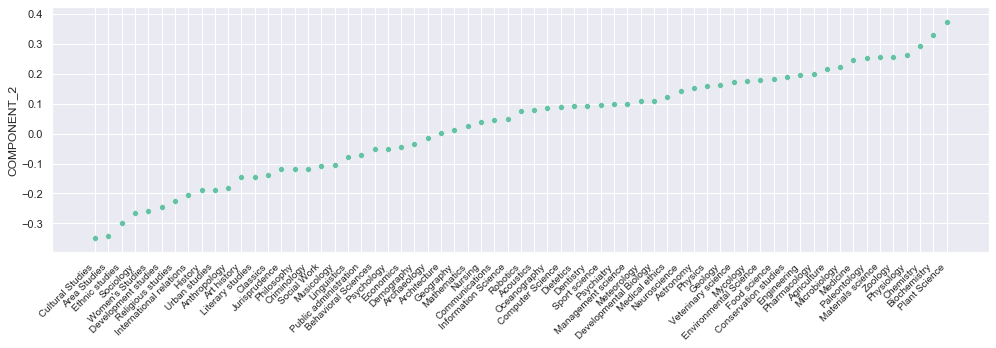

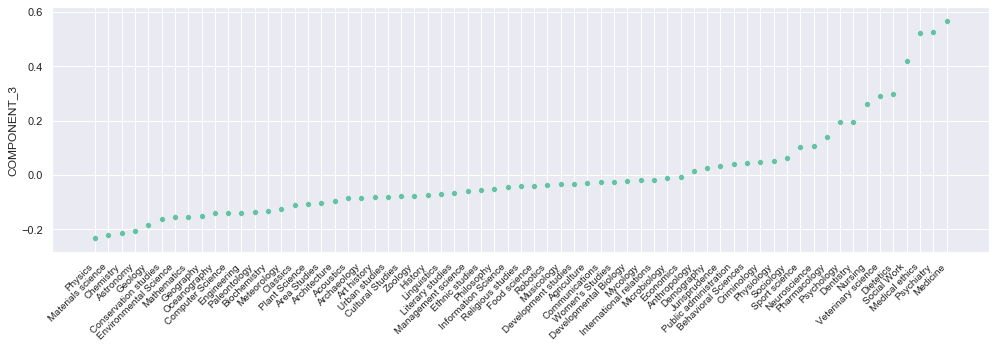

In [29]:
from mpl_toolkits.mplot3d import Axes3D


comb = combinations(cols, 3) 

comb = [list(i) for i in comb]


cmhot = plt.get_cmap("spring")

for i in comb:
    fig = plt.figure(figsize=(30,15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(vecs_df[i[0]], vecs_df[i[1]], vecs_df[i[2]], c=vecs_df['clusters'], s = 200, cmap='Accent')
    ax.set_xlabel(i[0])
    ax.set_ylabel(i[1])
    ax.set_zlabel(i[2])

    for j in range(len(vecs_df)):
        ax.text(vecs_df[i[0]][j]+0.015, vecs_df[i[1]][j]+0.015, vecs_df[i[2]][j]+0.015, vecs_df.index[j], fontsize = 'xx-small')
    
    ax.view_init(20, 35)

    fig.savefig('/Users/jamescarney/Desktop/Quantifying_interdisciplinarity/SVD_analysis/3D_interdisciplinary_'+i[0]+i[1]+i[2]+'.png', dpi = 300)

for i in comb[0]:
    PC = vecs_df[[i, 'clusters']]
    PC = PC.sort_values(by = i)
    plt.figure(figsize=(14,5))
    sns.set_palette("Set2")
    sns.scatterplot(x = PC.index, y = PC[i])
    plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
    plt.tight_layout()
    plt.savefig('/Users/jamescarney/Desktop/Quantifying_interdisciplinarity//SVD_analysis/3D_interdisciplinary_'+i+'.png', dpi = 300)


In [23]:
comb

[['PC1', 'PC2', 'PC3']]

In [1207]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [1177]:
comb

[['PC1', 'PC2', 'PC3'],
 ['PC1', 'PC2', 'PC4'],
 ['PC1', 'PC2', 'PC5'],
 ['PC1', 'PC2', 'PC6'],
 ['PC1', 'PC3', 'PC4'],
 ['PC1', 'PC3', 'PC5'],
 ['PC1', 'PC3', 'PC6'],
 ['PC1', 'PC4', 'PC5'],
 ['PC1', 'PC4', 'PC6'],
 ['PC1', 'PC5', 'PC6'],
 ['PC2', 'PC3', 'PC4'],
 ['PC2', 'PC3', 'PC5'],
 ['PC2', 'PC3', 'PC6'],
 ['PC2', 'PC4', 'PC5'],
 ['PC2', 'PC4', 'PC6'],
 ['PC2', 'PC5', 'PC6'],
 ['PC3', 'PC4', 'PC5'],
 ['PC3', 'PC4', 'PC6'],
 ['PC3', 'PC5', 'PC6'],
 ['PC4', 'PC5', 'PC6']]

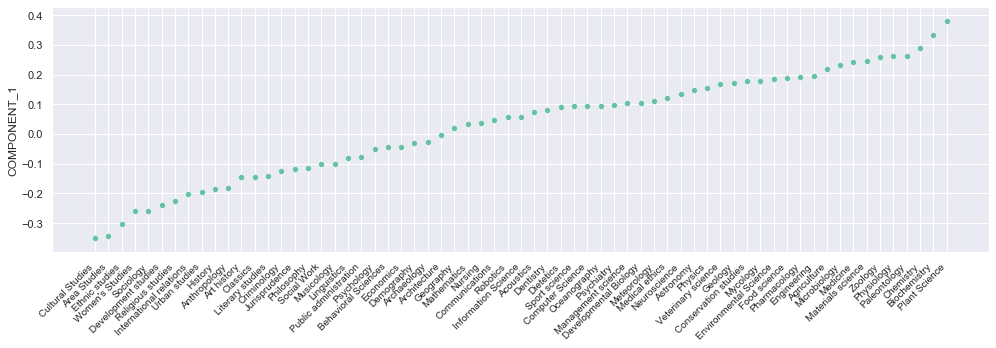

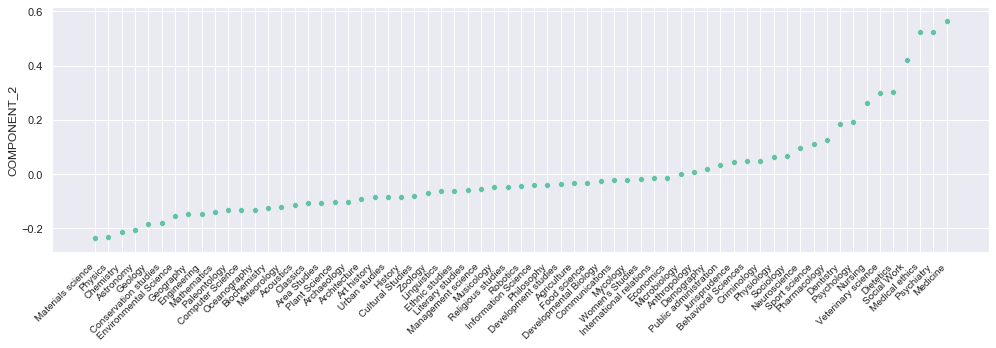

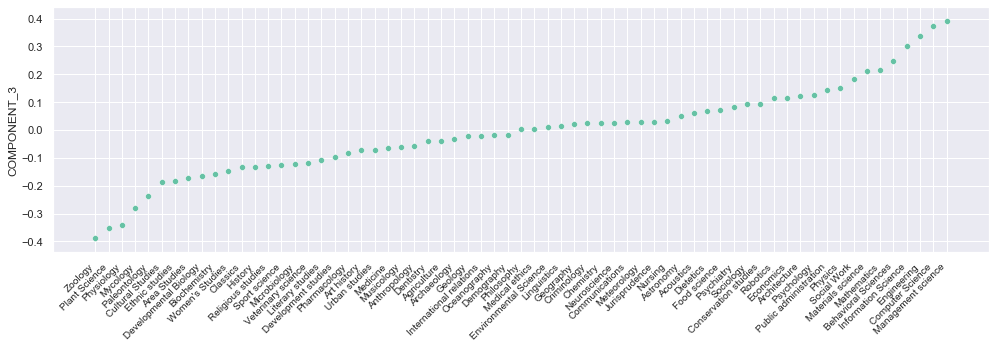

In [138]:
for i in ['COMPONENT_1', 'COMPONENT_2', 'COMPONENT_3']:
    PC = vecs_df[[i, 'clusters']]
    PC = PC.sort_values(by = i)
    plt.figure(figsize=(14,5))
    sns.set_palette("Set2")
    sns.scatterplot(x = PC.index, y = PC[i])
    plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
    plt.tight_layout()
    plt.savefig('/Users/jamescarney/Desktop/Quantifying_interdisciplinarity/3D_interdisciplinary_'+i+'.png', dpi = 300)


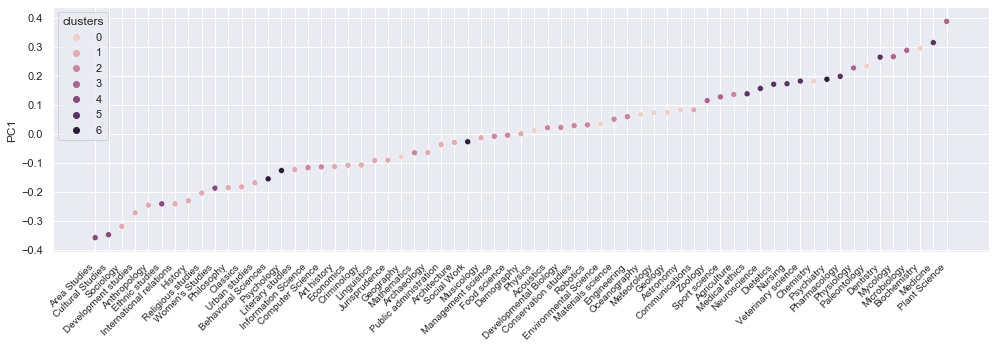

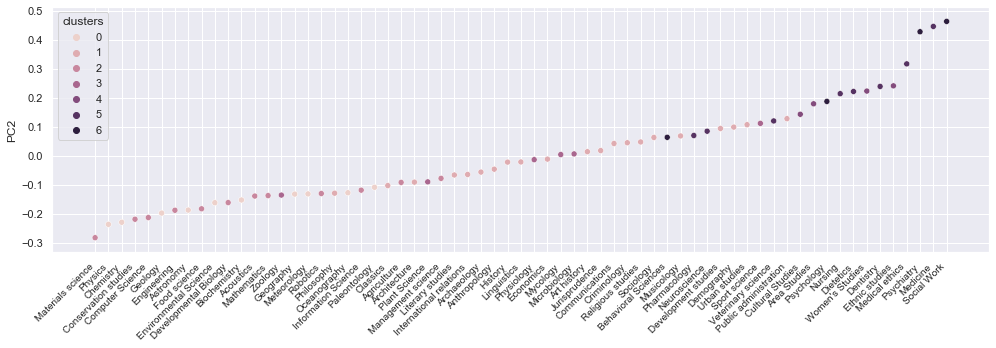

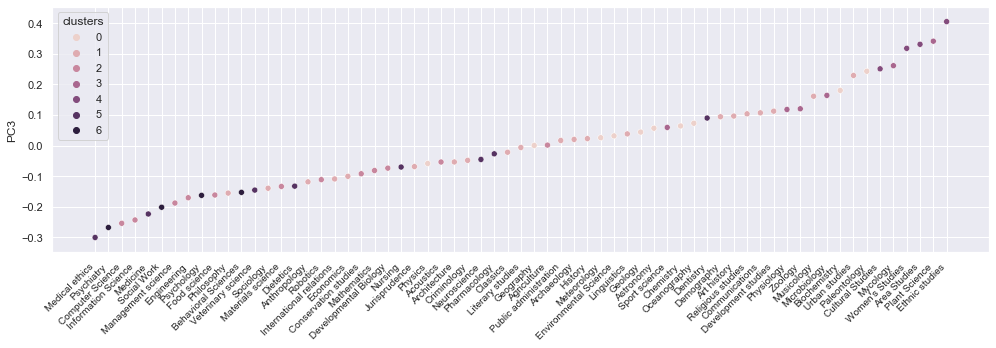

In [31]:


for i in cols:
    PC = vecs_df[[i, 'clusters']]
    PC = PC.sort_values(by = i)
    plt.figure(figsize=(14,5))
    sns.set_palette("Set2")
    sns.scatterplot(x = PC.index, y = PC[i], hue = PC['clusters'])
    plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
    plt.tight_layout()
    plt.savefig('/Users/jamescarney/Desktop/Quantifying_interdisciplinarity/3D_interdisciplinary_'+i+'.png', dpi = 300)


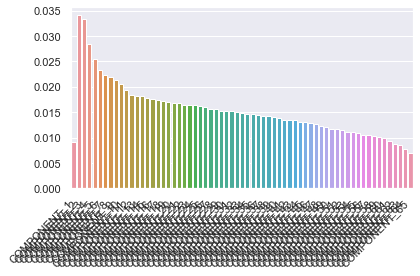

In [52]:
import matplotlib.pyplot as plt
plt.tight_layout()

explained_variance=pd.Series(svd.explained_variance_ratio_, index = pc_df_1.columns)

h = sns.barplot(x = explained_variance.index, y = explained_variance.values)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

#plt.savefig('/Users/jamescarney/Desktop/Quantifying_interdisciplinarity/SVD_analysis/Scree_plot.png', dpi = 300)

In [33]:
sum(explained_variance.values)

0.1532177613357117

In [38]:
svd.explained_variance_ratio_

array([0.00909956, 0.03401903, 0.03328096, 0.0284227 , 0.0252966 ,
       0.02309889])

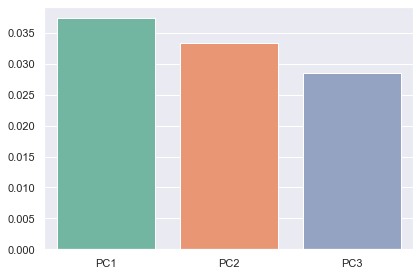

In [46]:
import matplotlib.pyplot as plt
plt.tight_layout()

explained_variance=pd.Series(pca_1.explained_variance_ratio_, index = pc_df_1.columns)

h = sns.barplot(x = explained_variance.index, y = explained_variance.values)
plt.tight_layout()

plt.savefig('/Users/jamescarney/Desktop/Quantifying_interdisciplinarity/Scree_plot.png', dpi = 300)


In [47]:
sum(explained_variance.values)

0.0992262115833011

In [979]:
var_ = explained_variance.values

In [44]:
vecs_df

-pron-   10        12   13   14   15   16   17        18  \
Architecture           0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000   
Agriculture            0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000   
Astronomy              0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000   
Archaeology            0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000   
Acoustics              0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.008165   
...                    ...  ...       ...  ...  ...  ...  ...  ...       ...   
Plant Science          0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000   
Psychiatry             0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.006850   
Sport science          0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000   
Veterinary science     0.0  0.0  0.015981  0.0  0.0  0.0  0.0  0.0  0.000000   
Zoology                0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000   

                          19  ...  zuhr  zume  zur  zurich  zurvanism  \
Architecture        0.000000  ...   0.0   0.0  0.0     0.0        0.0   
Agriculture         0.000000  ...   0.0   0.0  0.0     0.0        0.0   
Astronomy           0.000000  ...   0.0   0.0  0.0     0.0        0.0   
Archaeology         0.000000  ...   0.0   0.0  0.0     0.0        0.0   
Acoustics           0.006036  ...   0.0   0.0  0.0     0.0        0.0   
...                      ...  ...   ...   ...  ...     ...        ...   
Plant Science       0.000000  ...   0.0   0.0  0.0     0.0        0.0   
Psychiatry          0.005064  ...   0.0   0.0  0.0     0.0        0.0   
Sport science       0.000000  ...   0.0   0.0  0.0     0.0        0.0   
Veterinary science  0.000000  ...   0.0   0.0  0.0     0.0        0.0   
Zoology             0.000000  ...   0.0   0.0  0.0     0.0        0.0   

                      zygote       PC1       PC2       PC3  clusters  
Architecture        0.000000 -0.015843 -0.087675  0.108020         1  
Agriculture         0.000000 -0.181757 -0.014869 -0.025162         0  
Astronomy           0.000000 -0.146970 -0.192965  0.064861         0  
Archaeology         0.000000  0.047554 -0.092021 -0.016637         1  
Acoustics           0.000000 -0.108204 -0.088369  0.075938         1  
...                      ...       ...       ...       ...       ...  
Plant Science       0.006542 -0.336932 -0.079149 -0.315193         5  
Psychiatry          0.000000 -0.024956  0.538293  0.069415         2  
Sport science       0.000000 -0.079758  0.106755 -0.088170         5  
Veterinary science  0.000000 -0.164153  0.300844 -0.082723         2  
Zoology             0.000000 -0.184764 -0.056793 -0.350787         5  

[65 rows x 17265 columns]

In [981]:
sum(var_[:8])

0.42056450721913213

In [983]:
sum(var_[:4])

0.23552978623328147

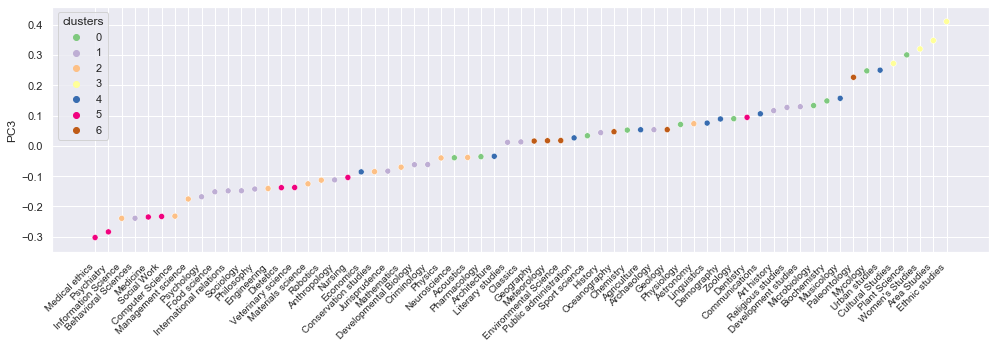

In [28]:
PC = vecs_df[['PC3', 'clusters']]

PC = PC.sort_values(by = 'PC3')

plt.figure(figsize=(14,5))
sns.scatterplot(x = PC.index, y = PC['PC3'], hue = PC['clusters'], palette = 'Accent')
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.tight_layout()
plt.savefig('/Users/jamescarney/Desktop/scatter_interdisciplinary.png', dpi = 300)

In [26]:
PC

PC3  clusters
Medical ethics      -0.303107         5
Psychiatry          -0.284420         5
Information Science -0.239708         2
Behavioral Sciences -0.239427         1
Medicine            -0.235290         5
...                       ...       ...
Cultural Studies     0.272170         3
Plant Science        0.300404         0
Women's Studies      0.320105         3
Area Studies         0.347808         3
Ethnic studies       0.410555         3

[65 rows x 2 columns]

In [31]:
vecs_df.columns

Index(['-pron-', '10', '12', '13', '14', '15', '16', '17', '18', '19',
       ...
       'zurich', 'zurvanism', 'zygote', 'COMPONENT_1', 'COMPONENT_2',
       'COMPONENT_3', 'COMPONENT_4', 'COMPONENT_5', 'COMPONENT_6', 'clusters'],
      dtype='object', length=17248)

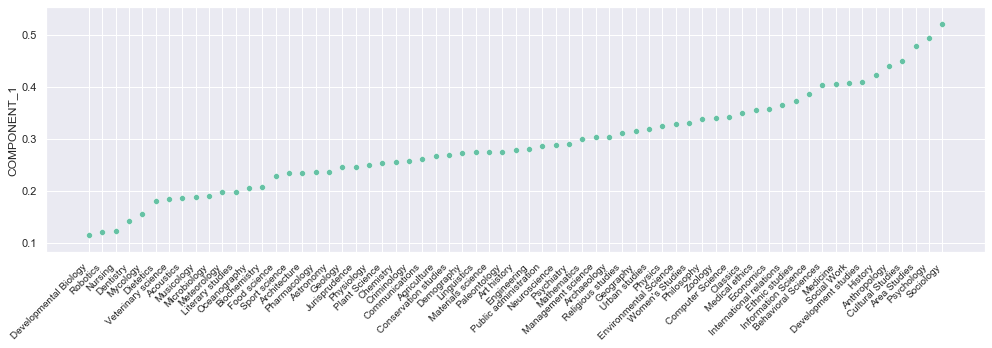

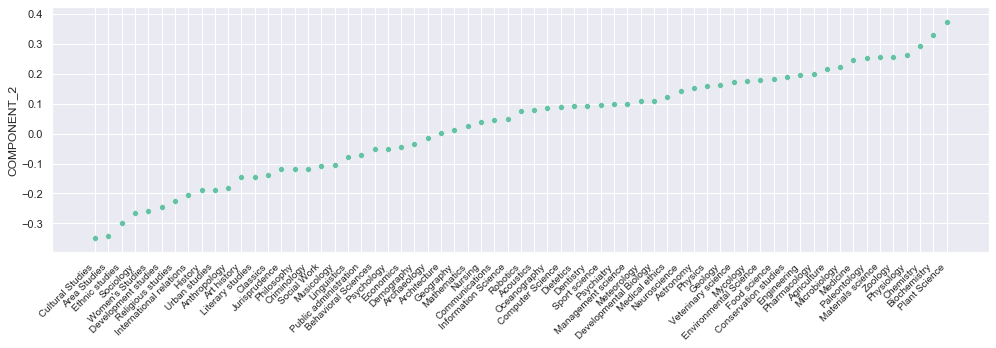

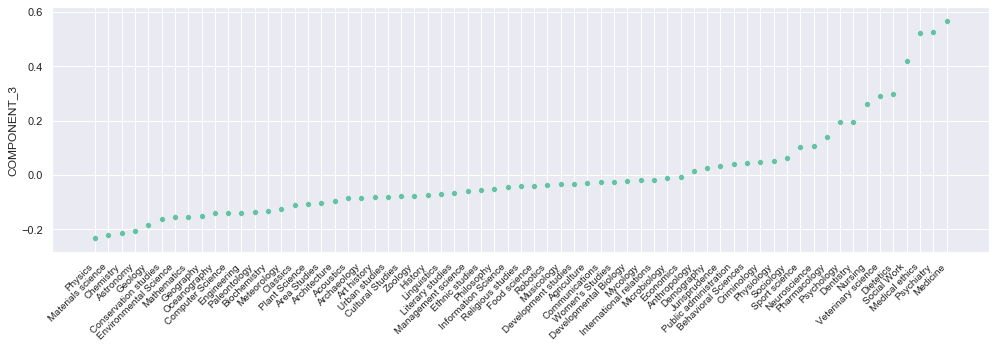

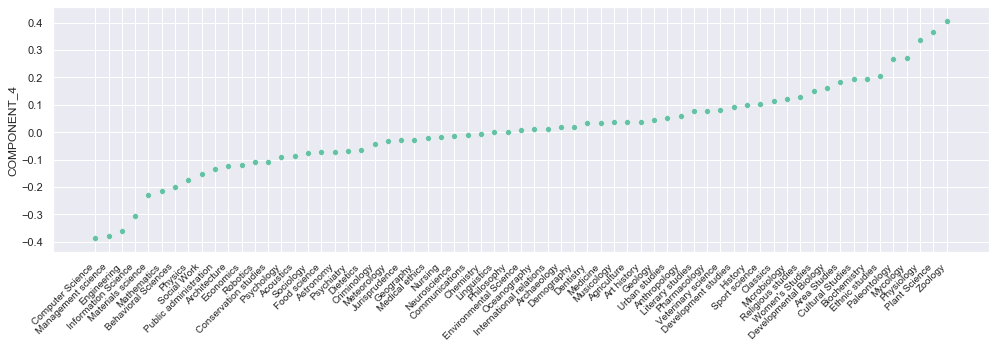

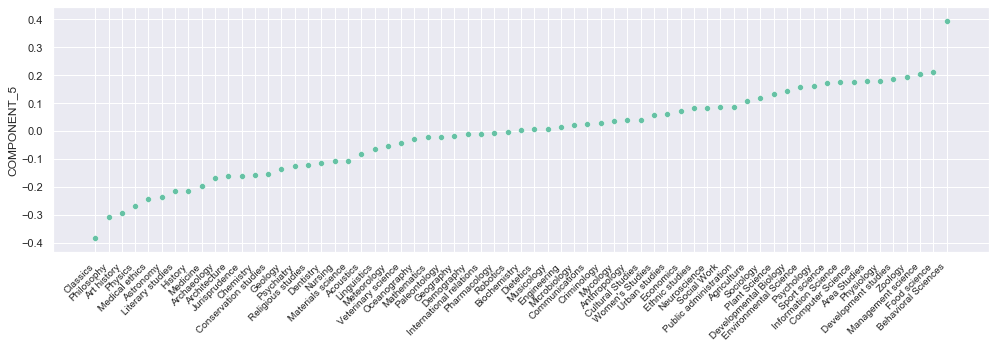

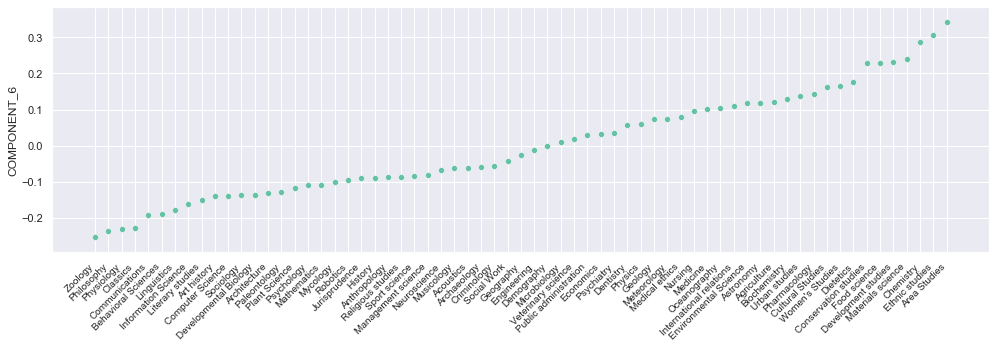

In [32]:
for i in ['COMPONENT_1', 'COMPONENT_2',
       'COMPONENT_3', 'COMPONENT_4', 'COMPONENT_5', 'COMPONENT_6']:
    PC = vecs_df[[i, 'clusters']]
    PC = PC.sort_values(by = i)
    plt.figure(figsize=(14,5))
    sns.set_palette("Set2")
    sns.scatterplot(x = PC.index, y = PC[i])
    plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
    plt.tight_layout()
    plt.savefig('/Users/jamescarney/Desktop/Quantifying_interdisciplinarity//SVD_analysis/3D_interdisciplinary_'+i+'.png', dpi = 300)


In [33]:
df.to_excel('/Users/jamescarney/Desktop/Quantifying_interdisciplinarity/Principal_Components_Analysis/TF-IDF_data.xlsx')

AttributeError: 'DataFrame' object has no attribute 'data'

In [45]:
df.to_csv('/Users/jamescarney/Desktop/Quantifying_interdisciplinarity/Principal_Components_Analysis/TF-IDF_data.csv')

In [48]:
df.shape

(65, 17261)

In [39]:
type(text)

list

In [40]:
text[0]

'Architecture (Latin architectura, from the Greek ἀρχιτέκτων arkhitekton "architect", from ἀρχι- "chief" and τέκτων "creator") is both the process and the product of planning, designing, and constructing buildings or other structures. Architectural works, in the material form of buildings, are often perceived as cultural symbols and as works of art. Historical civilizations are often identified with their surviving architectural achievements.The practice, which began in the prehistoric era, has been used as a way of expressing culture for civilizations on all seven continents. For this reason, architecture is considered to be a form of art. Texts on architecture have been written since ancient time. The earliest surviving text on architectural theory is the 1st century AD treatise De architectura by the Roman architect Vitruvius, according to whom a good building embodies firmitas, utilitas, and venustas (durability, utility, and beauty). Centuries later, Leon Battista Alberti develope

In [41]:
df.index[0]

'Architecture'

In [42]:
wiki = pd.DataFrame()

In [43]:
wiki['discipline'] = df.index

In [44]:
wiki['text'] = text

In [45]:
wiki.head(n=12)

discipline                                               text
0       Architecture  Architecture (Latin architectura, from the Gre...
1        Agriculture  Agriculture is the science, art and practice o...
2          Astronomy  Astronomy (from Greek: ἀστρονομία, literally m...
3        Archaeology  Archaeology or archeology is the study of huma...
4          Acoustics  Acoustics is a branch of physics that deals wi...
5        Art history  Art history is the study of aesthetic objects ...
6          Chemistry  Chemistry is the scientific study of the prope...
7       Area Studies  Area studies (also regional studies) are inter...
8   Computer Science  Computer science is the study of algorithmic p...
9          Economics  Economics () is the social science that studie...
10          Classics  Classics or classical studies is the study of ...
11      Anthropology  Anthropology is the scientific study of humani...

In [46]:
proc = [process(i) for i in text]

In [47]:
wiki['processed'] = proc

In [48]:
wiki.to_pickle('/Users/jamescarney/Desktop/Quantifying_interdisciplinarity/wiki_text_data.pkl')

In [49]:
wiki.to_excel('/Users/jamescarney/Desktop/Quantifying_interdisciplinarity/wiki_text_data.xlsx')

In [85]:
from transformers import pipeline

In [87]:
generator = pipeline('text-generation', model='gpt-neo-2.7B')

OSError: Can't load config for 'gpt-neo-2.7B'. Make sure that:

- 'gpt-neo-2.7B' is a correct model identifier listed on 'https://huggingface.co/models'

- or 'gpt-neo-2.7B' is the correct path to a directory containing a config.json file



In [88]:
len(df)


65

In [89]:
df.shape

(65, 17241)

In [90]:
df.head()

-pron-   10   12   13   14   15   16   17        18        19  \
Architecture     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
Agriculture      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
Astronomy        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
Archaeology      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
Acoustics        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.008163  0.006035   

              ...  zoroaster  zosimos  zuck  zuckermann  zuhr  zume  zur  \
Architecture  ...        0.0      0.0   0.0         0.0   0.0   0.0  0.0   
Agriculture   ...        0.0      0.0   0.0         0.0   0.0   0.0  0.0   
Astronomy     ...        0.0      0.0   0.0         0.0   0.0   0.0  0.0   
Archaeology   ...        0.0      0.0   0.0         0.0   0.0   0.0  0.0   
Acoustics     ...        0.0      0.0   0.0         0.0   0.0   0.0  0.0   

              zurich  zurvanism  zygote  
Architecture     0.0        0.0     0.0  
Agriculture      0.0        0.0     0.0  
Astronomy        0.0        0.0     0.0  
Archaeology      0.0        0.0     0.0  
Acoustics        0.0        0.0     0.0  

[5 rows x 17241 columns]

In [91]:
vecs_df.head()

-pron-   10   12   13   14   15   16   17        18        19  \
Architecture     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
Agriculture      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
Astronomy        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
Archaeology      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
Acoustics        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.008163  0.006035   

              ...  COMPONENT_42  COMPONENT_43  COMPONENT_44  COMPONENT_45  \
Architecture  ...      0.048657     -0.089437      0.019849      0.229522   
Agriculture   ...     -0.047626     -0.033653     -0.063896      0.013445   
Astronomy     ...      0.114215     -0.070006      0.001762      0.058020   
Archaeology   ...     -0.110448      0.063485      0.142880      0.006328   
Acoustics     ...     -0.059900     -0.059818     -0.138277      0.036554   

              COMPONENT_46  COMPONENT_47  COMPONENT_48  COMPONENT_49  \
Architecture     -0.191907      0.082349      0.164927     -0.019832   
Agriculture       0.060241      0.011226     -0.076582     -0.138145   
Astronomy         0.115012      0.108954      0.095214     -0.114633   
Archaeology       0.022568      0.164782      0.016984      0.065694   
Acoustics         0.058109     -0.038162     -0.016269     -0.025190   

              COMPONENT_50  clusters  
Architecture      0.051096         4  
Agriculture       0.169481         0  
Astronomy        -0.091205         1  
Archaeology      -0.144658         4  
Acoustics         0.036776         0  

[5 rows x 17292 columns]

In [92]:
vecs_df['clusters'].value_counts()

0    22
4    10
2     9
5     7
3     6
1     6
6     5
Name: clusters, dtype: int64

In [139]:
explained_variance=pd.Series(svd.explained_variance_ratio_, index = pc_df_1.columns)

In [140]:
explained_variance

COMPONENT_0    0.009099
COMPONENT_1    0.034052
COMPONENT_2    0.033259
COMPONENT_3    0.028293
dtype: float64

In [141]:
explained_variance = explained_variance['COMPONENT_1':]

In [142]:
explained_variance

COMPONENT_1    0.034052
COMPONENT_2    0.033259
COMPONENT_3    0.028293
dtype: float64

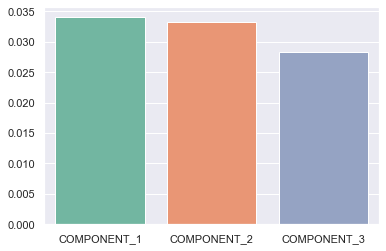

In [143]:
sns.barplot(x = explained_variance.index, y = explained_variance.values)

In [144]:
plt.savefig('/Users/jamescarney/Desktop/Quantifying_interdisciplinarity/SVD_explained.png', dpi = 300)

<Figure size 432x288 with 0 Axes>

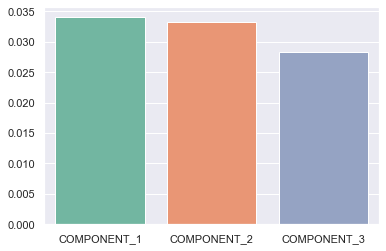

In [145]:
sns.barplot(x = explained_variance.index, y = explained_variance.values)
plt.savefig('/Users/jamescarney/Desktop/Quantifying_interdisciplinarity/SVD_explained.png', dpi = 300)

In [146]:
svd.model_components()

AttributeError: 'TruncatedSVD' object has no attribute 'model_components'

In [147]:
comps_1.model_components()

AttributeError: 'numpy.ndarray' object has no attribute 'model_components'

In [148]:
svd.model_components

AttributeError: 'TruncatedSVD' object has no attribute 'model_components'

In [149]:
svd.components_

array([[ 2.92864863e-04,  2.48796718e-03,  1.95836970e-03, ...,
         4.60726920e-04,  6.88071281e-04,  2.75446381e-04],
       [ 4.77439842e-04, -1.63284902e-03,  2.45685757e-04, ...,
        -7.10692115e-04, -6.45902534e-04,  1.19333709e-03],
       [-5.46517162e-04, -1.53317220e-03,  1.06396425e-03, ...,
        -4.27335432e-04, -1.70551473e-04, -3.49799502e-04],
       [ 9.52748826e-05,  7.27341287e-04, -1.43522960e-03, ...,
        -4.85303495e-04,  1.32824081e-04, -1.37259448e-03]])

In [150]:
vocab = vectorizer.get_feature_names()

for i, comp in enumerate(svd.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
study social science include theory cultural history research work field 

Topic 1: 
plant physiology food chemical engineer cell medicine animal material organism 

Topic 2: 
medical patient medicine care mental nurse social health psychiatry physician 

Topic 3: 
engineer science management computer information social mathematics mathematical model material 



In [151]:
len(vocab)

17241

In [152]:
len(svd.components_[0])

17241

In [153]:
len(svd.components_[0])

17241

In [154]:
np.shape(svd.components_[0])

NameError: name 'np' is not defined

In [155]:
import numpy as np

In [156]:
np.shape(svd.components_[0])

(17241,)

In [157]:
test = pd.DataFrame(svd.components_)

In [158]:
test.shape

(4, 17241)

In [159]:
len(test)

4

In [160]:
len(vecs_df)

65

In [161]:
vecs_df.shape

(65, 17246)

In [162]:
test.head()

0         1         2         3         4         5         6      \
0  0.000293  0.002488  0.001958  0.000904  0.001081  0.000978  0.001574   
1  0.000477 -0.001633  0.000246 -0.001044 -0.000342  0.001547 -0.000591   
2 -0.000547 -0.001533  0.001064 -0.000795  0.002026  0.001470 -0.000886   
3  0.000095  0.000727 -0.001435 -0.001172 -0.001259 -0.000569 -0.000991   

      7         8         9      ...     17231     17232     17233     17234  \
0  0.000317  0.002475  0.005542  ...  0.000688  0.000340  0.000316  0.000412   
1 -0.000497 -0.002074 -0.003044  ... -0.000646  0.001116 -0.000275  0.000214   
2 -0.000306  0.000684  0.001901  ... -0.000171 -0.000845  0.000100 -0.000097   
3 -0.000417 -0.000447 -0.002935  ...  0.000133  0.000174  0.000609  0.000195   

      17235     17236     17237     17238     17239     17240  
0  0.000835  0.000075  0.000358  0.000461  0.000688  0.000275  
1  0.002941  0.000084 -0.000521 -0.000711 -0.000646  0.001193  
2 -0.000047 -0.000097  0.000226 -0.000427 -0.000171 -0.000350  
3 -0.001806  0.000271  0.000183 -0.000485  0.000133 -0.001373  

[4 rows x 17241 columns]

In [163]:
vecs_df.head()

-pron-   10   12   13   14   15   16   17        18        19  \
Architecture     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
Agriculture      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
Astronomy        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
Archaeology      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
Acoustics        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.008163  0.006035   

              ...  zume  zur  zurich  zurvanism  zygote  COMPONENT_0  \
Architecture  ...   0.0  0.0     0.0        0.0     0.0     0.234075   
Agriculture   ...   0.0  0.0     0.0        0.0     0.0     0.266205   
Astronomy     ...   0.0  0.0     0.0        0.0     0.0     0.236809   
Archaeology   ...   0.0  0.0     0.0        0.0     0.0     0.304154   
Acoustics     ...   0.0  0.0     0.0        0.0     0.0     0.186111   

              COMPONENT_1  COMPONENT_2  COMPONENT_3  clusters  
Architecture    -0.003546    -0.091760     0.123032         4  
Agriculture      0.217622    -0.031281    -0.039514         1  
Astronomy        0.148490    -0.207584     0.051586         3  
Archaeology     -0.025821    -0.102424    -0.031321         4  
Acoustics        0.072929    -0.112487     0.061571         0  

[5 rows x 17246 columns]

In [166]:
vecs_.shape()

TypeError: 'tuple' object is not callable

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:960: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


<Figure size 2160x1080 with 0 Axes>

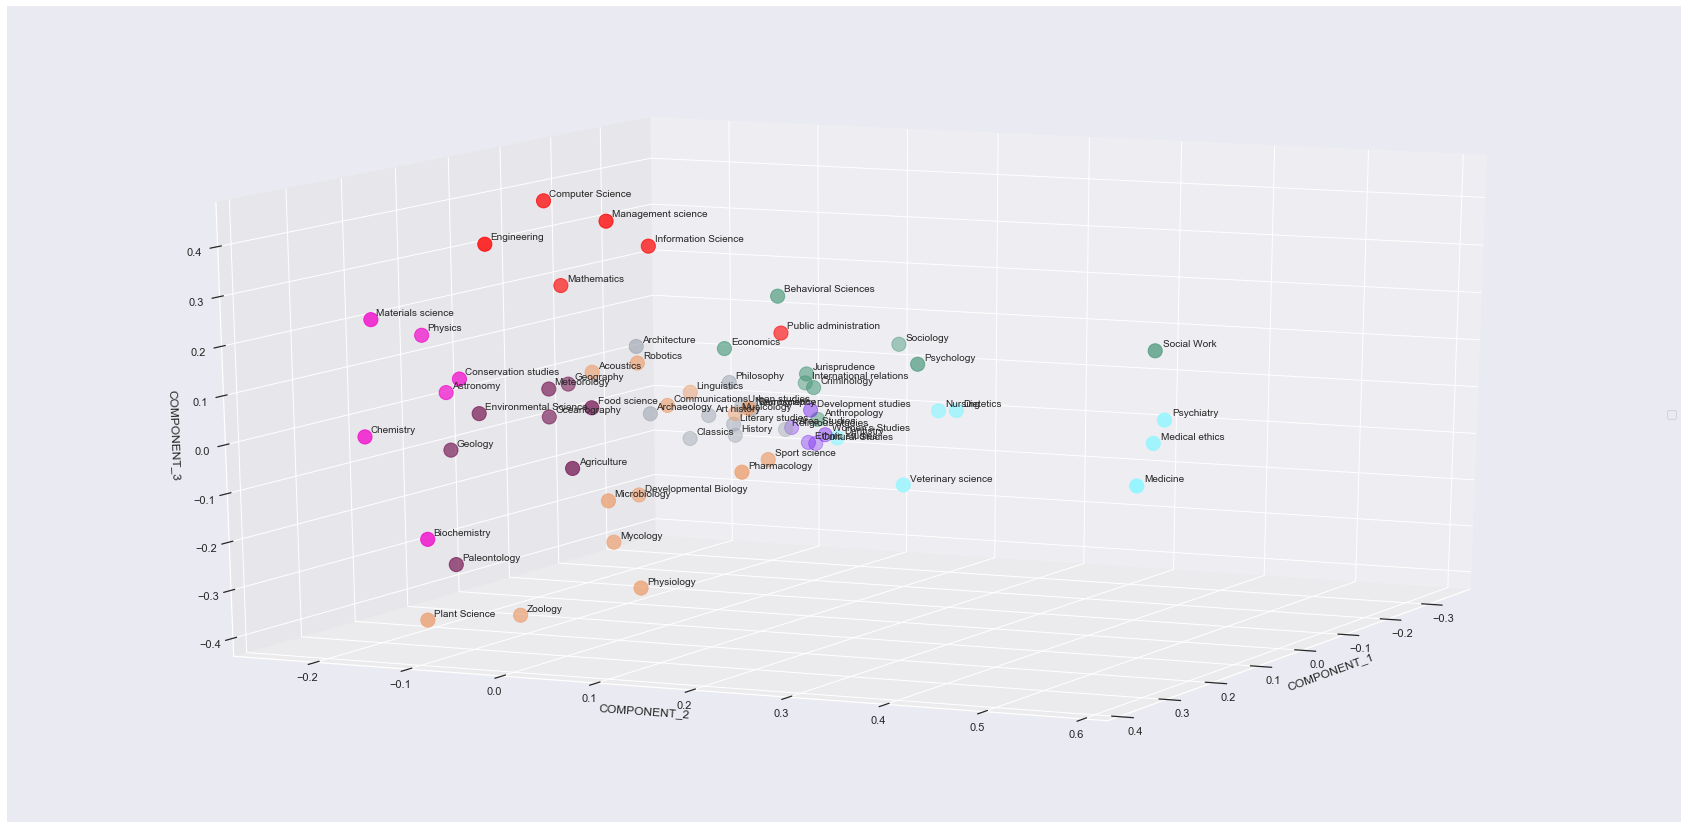

In [167]:
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=4)


vecs_ = df


comps_1 = svd.fit_transform(vecs_)

cols = ['COMPONENT_'+str(i) for i in range(comps_1.shape[1])]

pc_df_1 = pd.DataFrame(data = comps_1, columns = cols)

clustering = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage = 'ward').fit(vecs_)

#clustering = AffinityPropagation(preference = 10).fit(vecs_)

vecs_ = vecs_.reset_index()


vecs_df = pd.concat([vecs_, pc_df_1], axis = 1)

vecs_df.index = df.index

del vecs_df['level_0']


vecs_df['clusters'] = clustering.labels_

from matplotlib.colors import ListedColormap

color = ["#ECA172", "#761954","#419474","#F205CB","#9BA3AE","#98F5FF","#6805F2", "#FF0000"]

clus = [i for i in range(8)]

color = dict(zip(clus, color))

vecs_df['color'] = [color[i] for i in vecs_df['clusters']]

plt.figure(figsize=(30,15))

cmhot = plt.get_cmap("Accent")

fig = plt.figure(figsize=(30,15))

ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter3D(vecs_df['COMPONENT_1'], vecs_df['COMPONENT_2'], vecs_df['COMPONENT_3'], s = 200, c = vecs_df['color'])
plt.legend(*sc.legend_elements(), loc = "right")

ax.set_xlabel('COMPONENT_1')
ax.set_ylabel('COMPONENT_2')
ax.set_zlabel('COMPONENT_3')


for i in range(len(vecs_df)):
    ax.text(vecs_df['COMPONENT_1'][i]+0.015, vecs_df['COMPONENT_2'][i]+0.015, vecs_df['COMPONENT_3'][i]+0.015, vecs_df.index[i], fontsize = 'small')

ax.view_init(15, 25)

fig.savefig('/Users/jamescarney/Desktop/Quantifying_interdisciplinarity/3D_SVD_interdisciplinary_pembroke.png', dpi = 300)


In [171]:
test = df.head()

In [172]:
comps_1 = svd.fit_transform(test)

In [173]:
comps_1

array([[ 0.49662933, -0.27641471, -0.60924224, -0.32966178],
       [ 0.46948338, -0.56707303,  0.30474039,  0.59430031],
       [ 0.48148445,  0.37652099,  0.61113304, -0.31772103],
       [ 0.58060497, -0.1168153 ,  0.03647387, -0.33144868],
       [ 0.45192983,  0.6417845 , -0.34503354,  0.50920311]])

In [175]:
test.shape

(5, 17241)

In [176]:
np.shape(comps_1)

(5, 4)

In [177]:
svd.components_

array([[-2.16613161e-16, -1.36837500e-15, -9.15321098e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.81984567e-16, -5.40090127e-15, -4.97003741e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.22945304e-16,  2.01120094e-15,  3.86487320e-15, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.30516633e-15,  7.73096695e-15,  3.77928679e-15, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])